In [1]:
%matplotlib inline
import rpy2
import rpy2.robjects.packages as rpackages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import networkx as nx
%load_ext rpy2.ipython

In [70]:
%%R
df <- read.table("./igo2004.csv",sep=",")

In [71]:
%%R
df

      V1      V2                                       V3   V4     V5    V6
1     NA  ioname                                  orgname year russia china
2   2069    AsDB                          Asian Dev. Bank 2000      0     1
3   4949     FAO                            Food & Ag Org 2000      0     1
4   5556    IAEA                Intl Atomic Energy Agency 2000      1     1
5   6034    ICAC                    Intl Cotton Adv Comte 2000      1     0
6   7042     IGC                      Intl Grains Council 2000      1     0
7   8246    ISDB                        Islamic Dev. Bank 2000      0     0
8   8454   ITVRC                   Intgvt TV & Radio Corp 2000      1     0
9   9596     NAM                     Non-Aligned Movement 2000      0     0
10 10581    OSCE         Org. Security Cooperation Europe 2000      1     0
11 10860     PCA           Permanent Court of Arbitration 2000      1     1
12 10984   PIARC                          World Road Assn 2000      1     1
13 11274    

In [72]:
%%R
x <- matrix(0, nrow = 8, ncol = 8)
for (i in 2:length(df[,1])) {
    print (i)
    print (df[i,][5:length(df[i,])])
    print (length(df[i,][5:length(df[i,])]))
    
    for (j in 1:length(df[i,][5:length(df[i,])])){
        print (j)
        print (df[i,][5:length(df[i,])][j])
        if (df[i,][5:length(df[i,])][j]==0){
            print ("zero")
        }else{
            for (k in 1:length(df[i,][5:length(df[i,])])){
                print (k)
                if (df[i,][5:length(df[i,])][k]==1){
                print (x[k,j])
                x[k,j]=x[k,j]+1
                print (x[k,j])
                print ("target")
                }
            }
        }
    }
    #for (country_val in df[i,][5:length(df[i,])]){
    #    print (country_val)
    #    if (country_val==0) {
    #    
    #    print ("bla")
    #    }else {
    #    print ("nobla")
    #    }
    #    
    #}
}

[1] 2
  V5 V6 V7 V8 V9 V10 V11 V12
2  0  1  1  1  1   0   1   1
[1] 8
[1] 1
  V5
2  0
[1] "zero"
[1] 2
  V6
2  1
[1] 1
[1] 2
[1] 0
[1] 1
[1] "target"
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 0
[1] 1
[1] "target"
[1] 3
  V7
2  1
[1] 1
[1] 2
[1] 0
[1] 1
[1] "target"
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 0
[1] 1
[1] "target"
[1] 4
  V8
2  1
[1] 1
[1] 2
[1] 0
[1] 1
[1] "target"
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 0
[1] 1
[1] "target"
[1] 5
  V9
2  1
[1] 1
[1] 2
[1] 0
[1] 1
[1] "target"
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 0
[1] 1
[1] "target"
[1] 6
  V10
2   0
[1] "zero"
[1] 7
  V11
2   1


In [73]:
%%R
degree(x)


Error in degree(x) : could not find function "degree"


In [74]:
%%R
for (j in 5:12){
    a = 0
for (i in df[, j][2:length(df[, j])]){
    #print (class(i))
    a = a + as.numeric(i) 
}
    print (a)
}

[1] 11
[1] 8
[1] 11
[1] 11
[1] 7
[1] 10
[1] 12
[1] 8


In [75]:
%%R
x

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]   11    6    8    7    5    5    9    6
[2,]    6    8    6    6    4    4    6    5
[3,]    8    6   11    9    7    7    9    5
[4,]    7    6    9   11    7    8    8    4
[5,]    5    4    7    7    7    5    6    3
[6,]    5    4    7    8    5   10    7    2
[7,]    9    6    9    8    6    7   12    5
[8,]    6    5    5    4    3    2    5    8


In [76]:
%Rpull x

In [77]:
print x

[[ 11.   6.   8.   7.   5.   5.   9.   6.]
 [  6.   8.   6.   6.   4.   4.   6.   5.]
 [  8.   6.  11.   9.   7.   7.   9.   5.]
 [  7.   6.   9.  11.   7.   8.   8.   4.]
 [  5.   4.   7.   7.   7.   5.   6.   3.]
 [  5.   4.   7.   8.   5.  10.   7.   2.]
 [  9.   6.   9.   8.   6.   7.  12.   5.]
 [  6.   5.   5.   4.   3.   2.   5.   8.]]


In [78]:
%%R
y = df[1, ][5:12]

In [79]:
%Rpull y

In [80]:
print y

       V5     V6          V7          V8          V9           V10  \
1  russia  china  kazakhstan  kyrgyzstan  tajikistan  turkmenistan   

          V11  V12  
1  uzbekistan  usa  


In [81]:
type(y)

pandas.core.frame.DataFrame

In [82]:
c = []
for index, row in y.iterrows():
    for i in row:
        c.append(i)

In [83]:
#a = np.loadtxt("bla1.csv", delimiter=',', unpack=True)
a = x

In [84]:
#with open("country.csv") as f:
#    for line in f:
#        c = line.replace("\"","").replace("\n","").split(",")

In [85]:
print(c)

['russia', 'china', 'kazakhstan', 'kyrgyzstan', 'tajikistan', 'turkmenistan', 'uzbekistan', 'usa']


In [86]:
print(a)

[[ 11.   6.   8.   7.   5.   5.   9.   6.]
 [  6.   8.   6.   6.   4.   4.   6.   5.]
 [  8.   6.  11.   9.   7.   7.   9.   5.]
 [  7.   6.   9.  11.   7.   8.   8.   4.]
 [  5.   4.   7.   7.   7.   5.   6.   3.]
 [  5.   4.   7.   8.   5.  10.   7.   2.]
 [  9.   6.   9.   8.   6.   7.  12.   5.]
 [  6.   5.   5.   4.   3.   2.   5.   8.]]


In [87]:
d = a.diagonal()

In [88]:
print(d.tolist())

[11.0, 8.0, 11.0, 11.0, 7.0, 10.0, 12.0, 8.0]


In [89]:
b = np.triu(a)

In [90]:
np.fill_diagonal(b, 0)

In [91]:
print(b)

[[ 0.  6.  8.  7.  5.  5.  9.  6.]
 [ 0.  0.  6.  6.  4.  4.  6.  5.]
 [ 0.  0.  0.  9.  7.  7.  9.  5.]
 [ 0.  0.  0.  0.  7.  8.  8.  4.]
 [ 0.  0.  0.  0.  0.  5.  6.  3.]
 [ 0.  0.  0.  0.  0.  0.  7.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [92]:
G=nx.Graph()
for idx,i in enumerate(b):
    for idy,j in enumerate(i):
        if j!=0:
            #print(c[idx],c[idy],j)
            G.add_edge(c[idx],c[idy],weight=j)

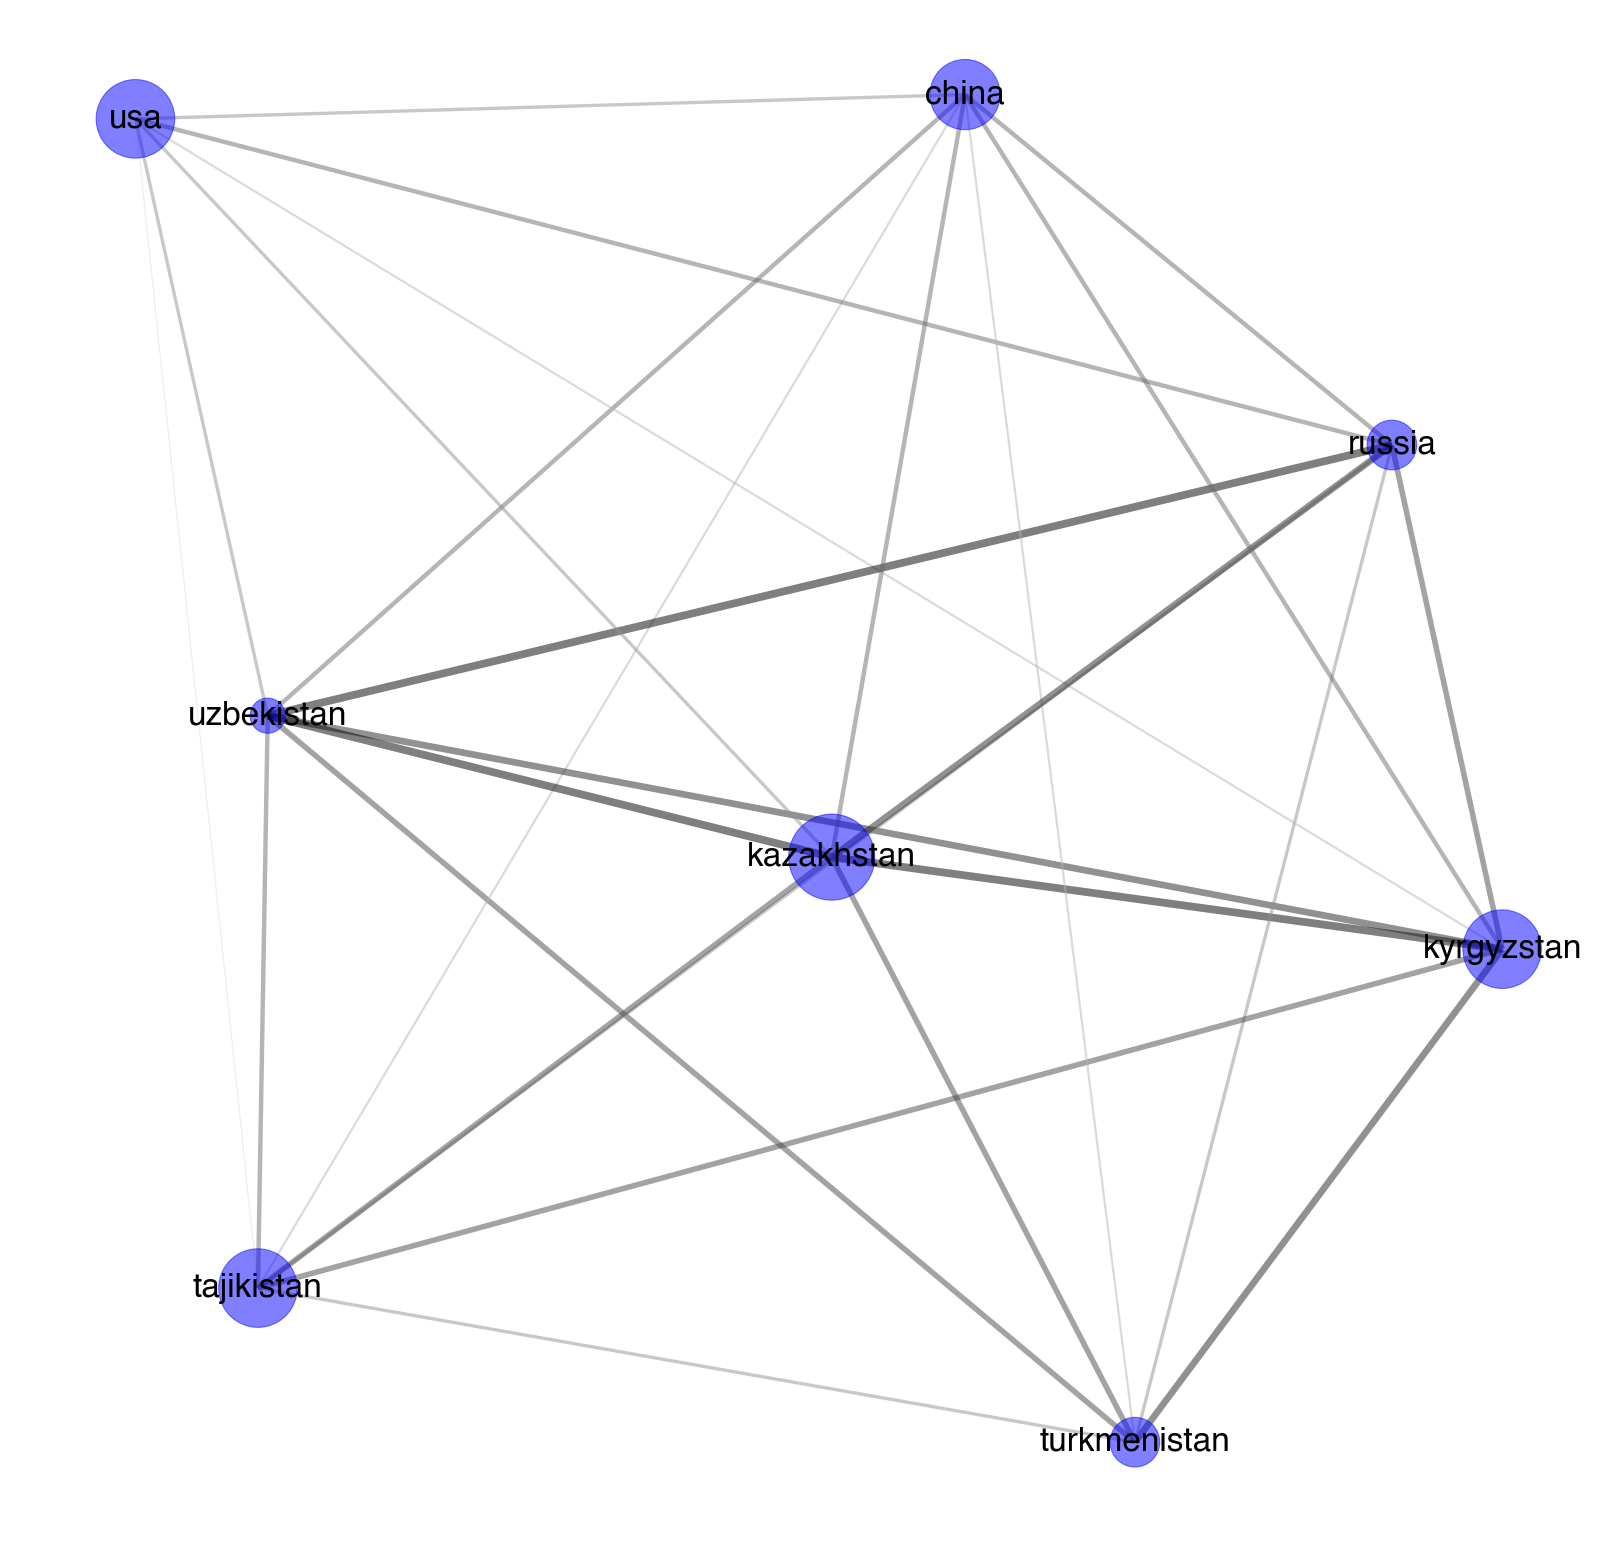

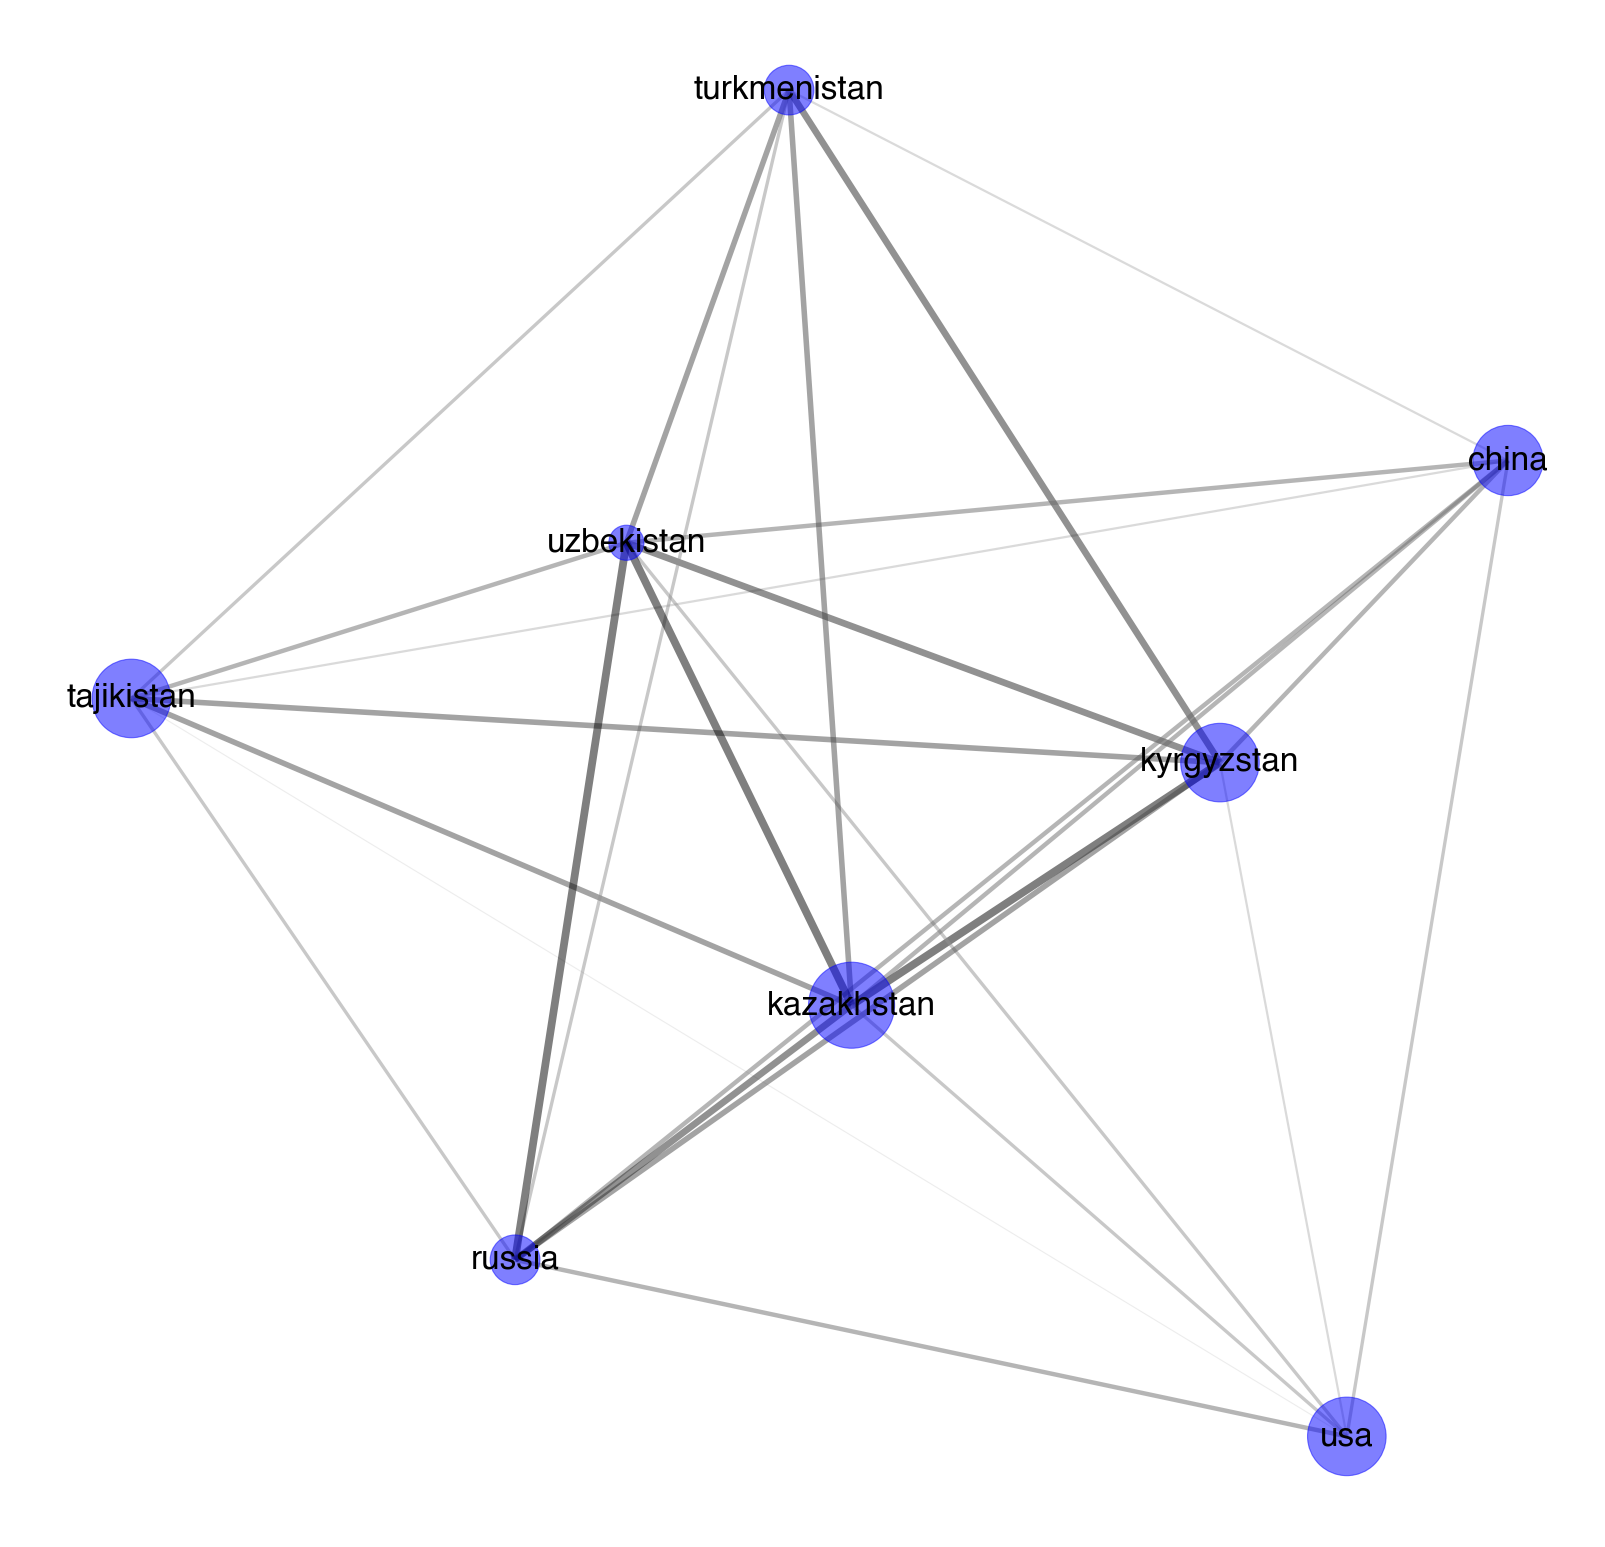

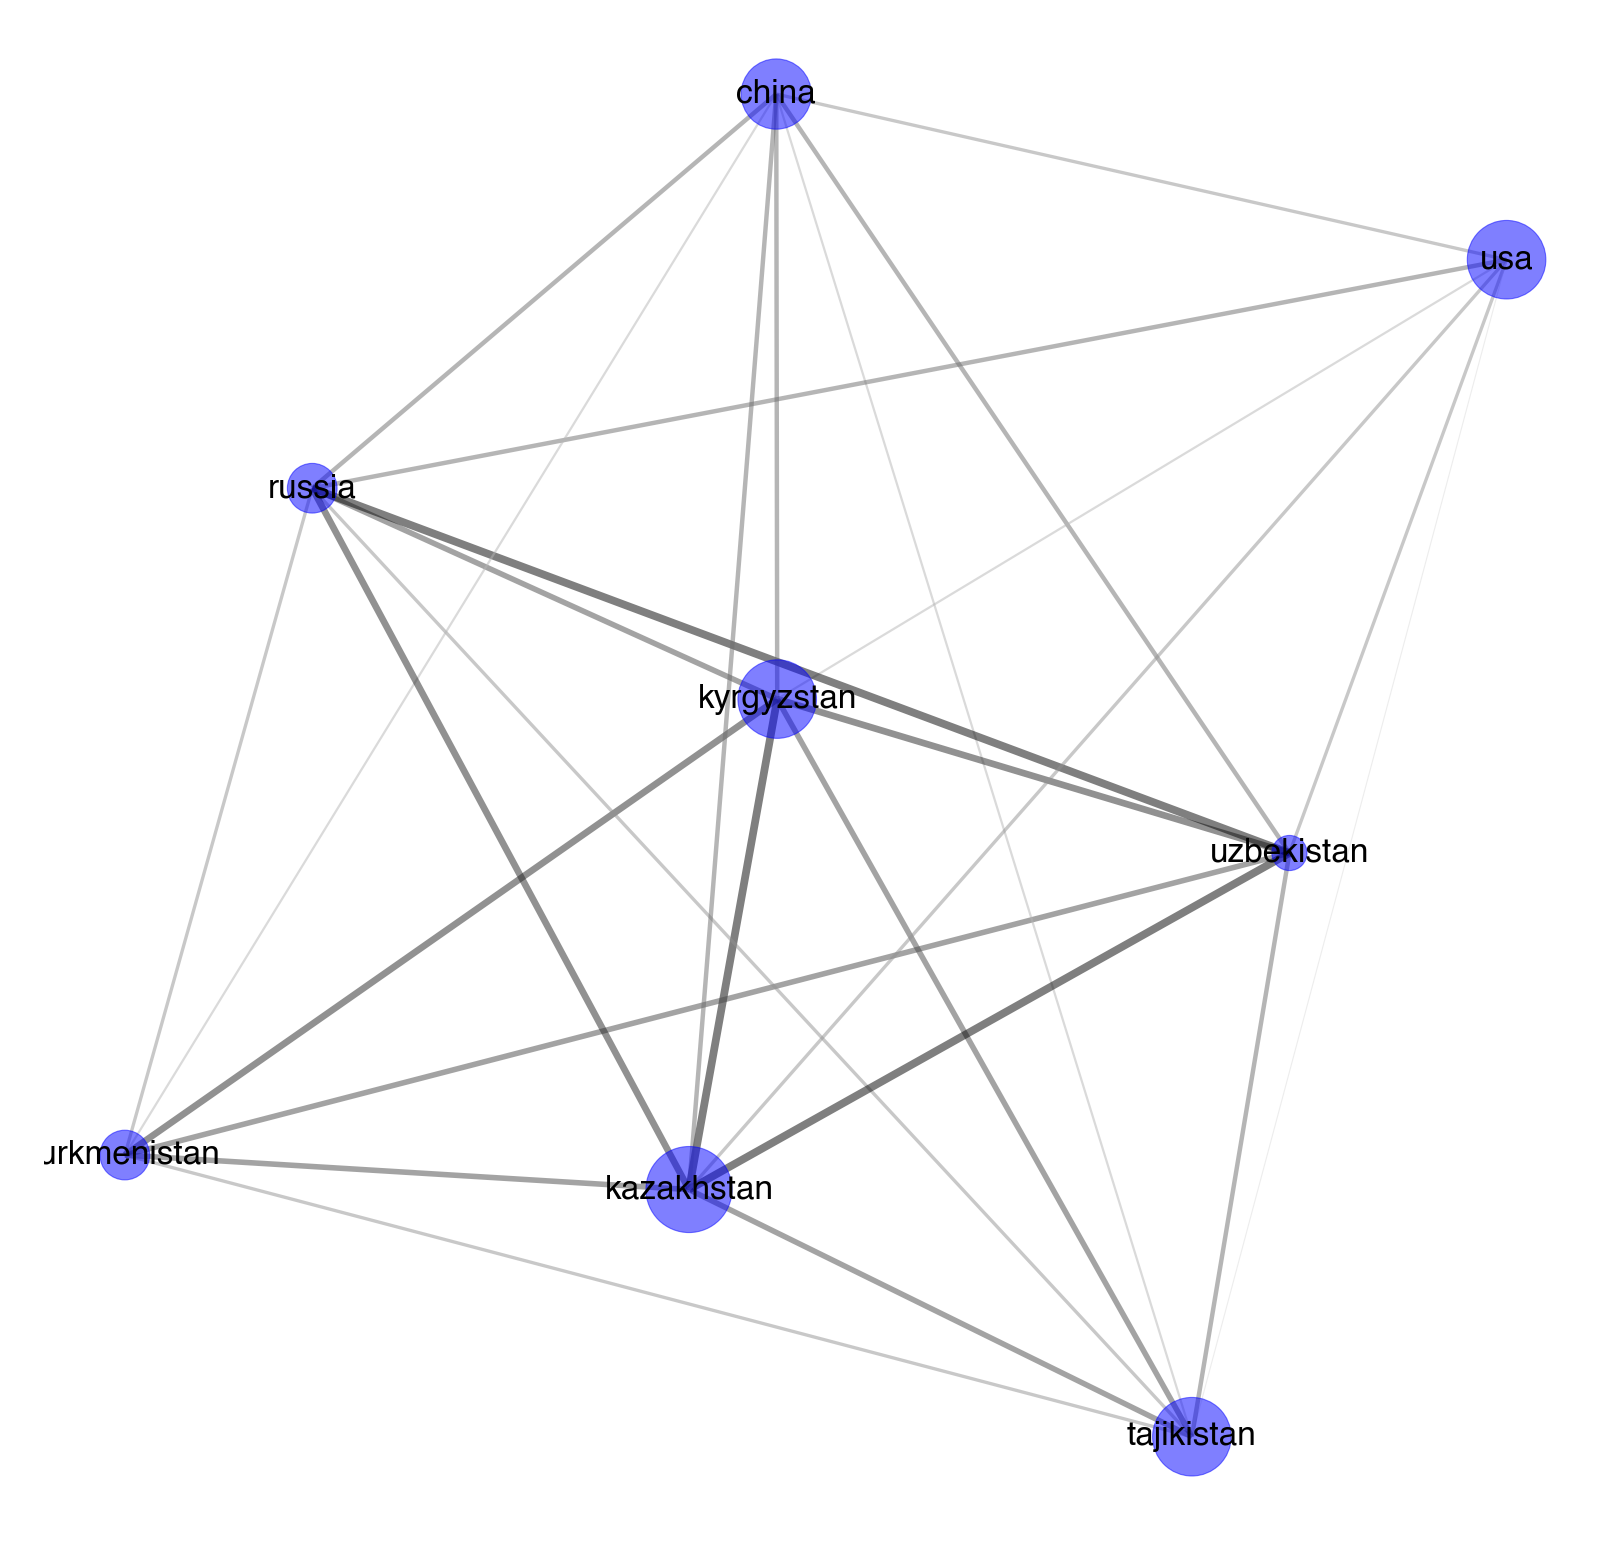

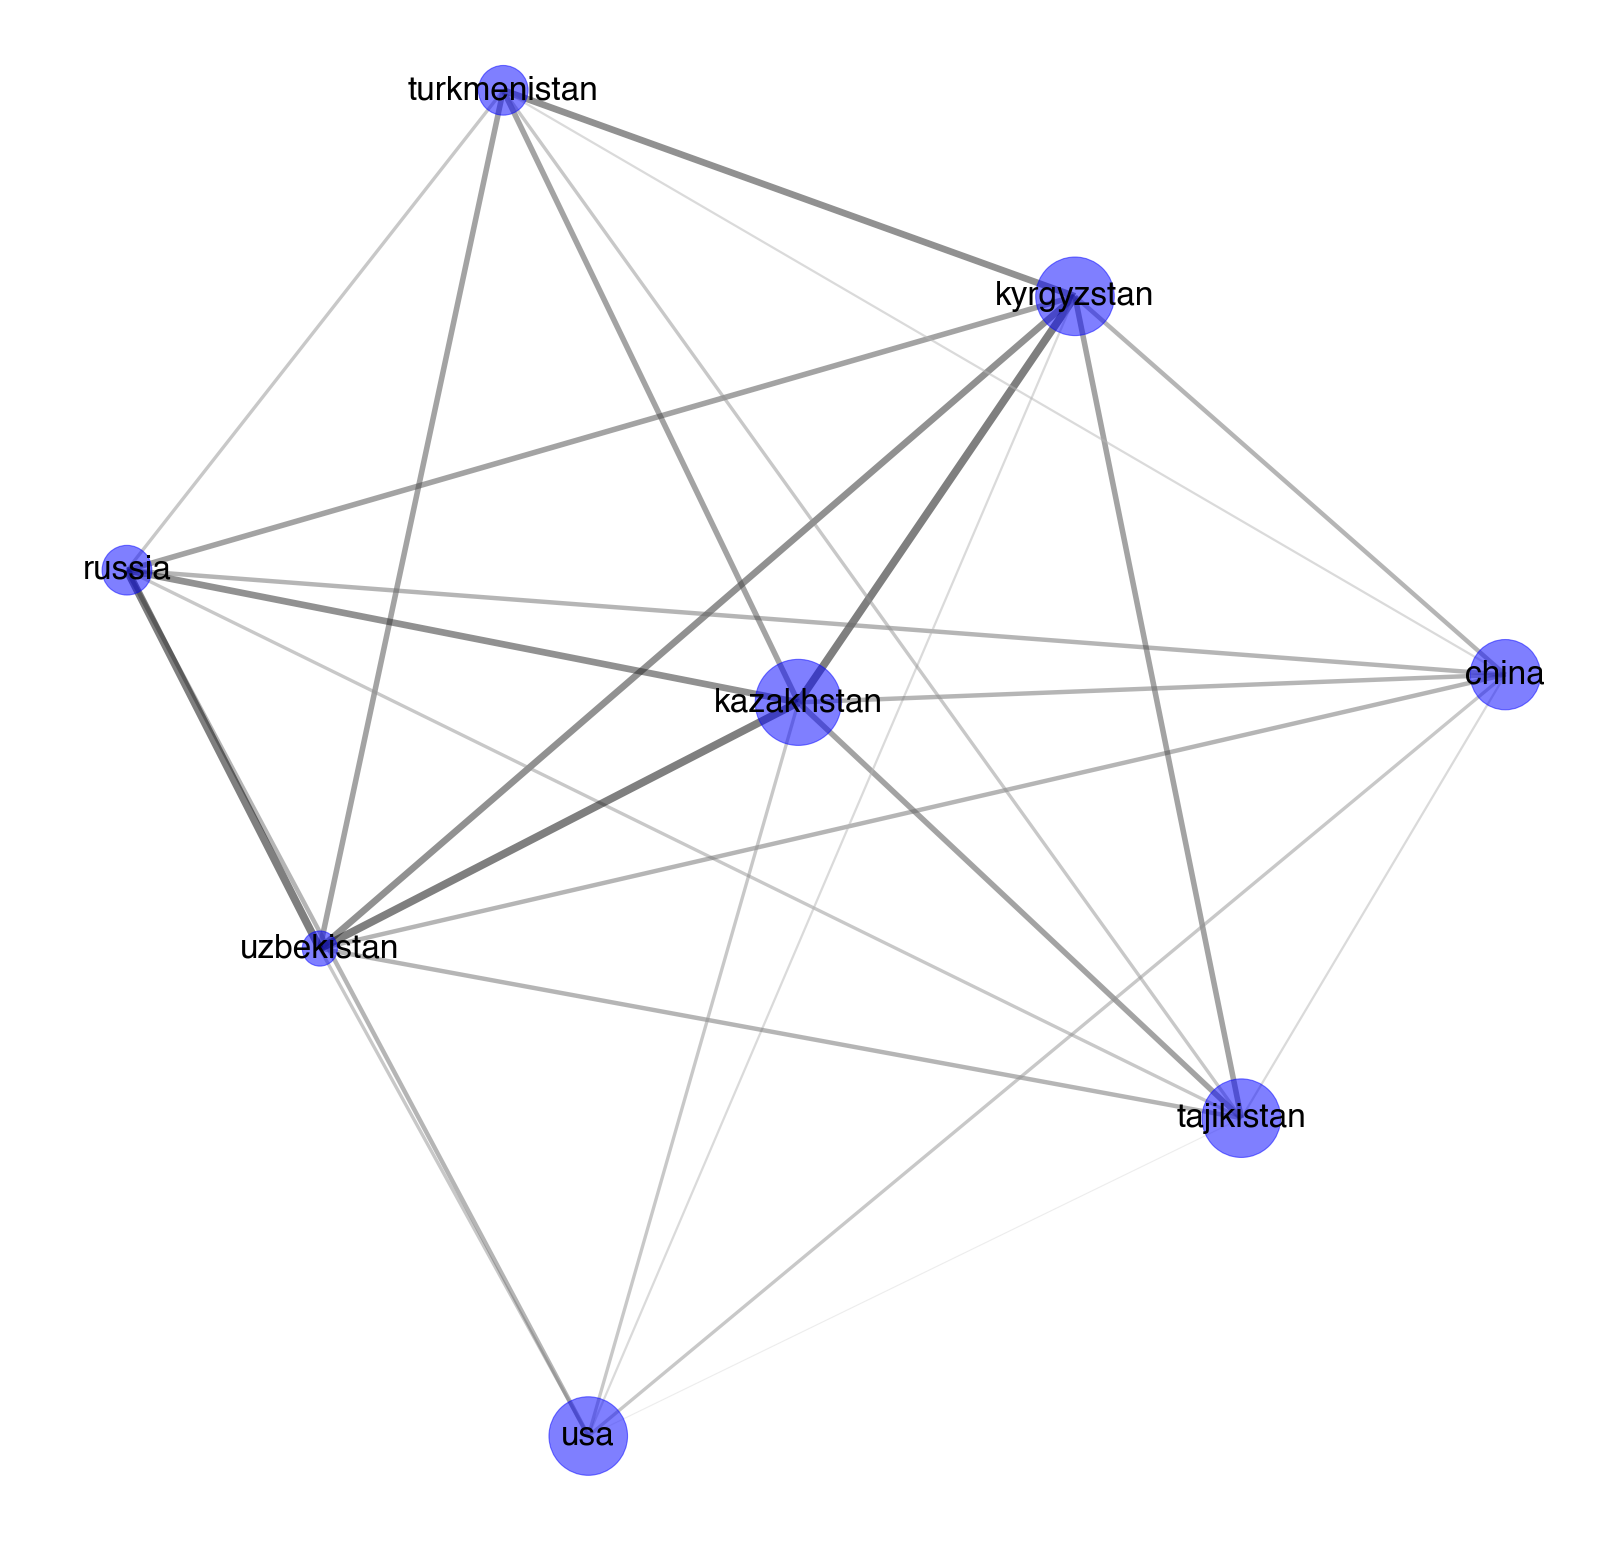

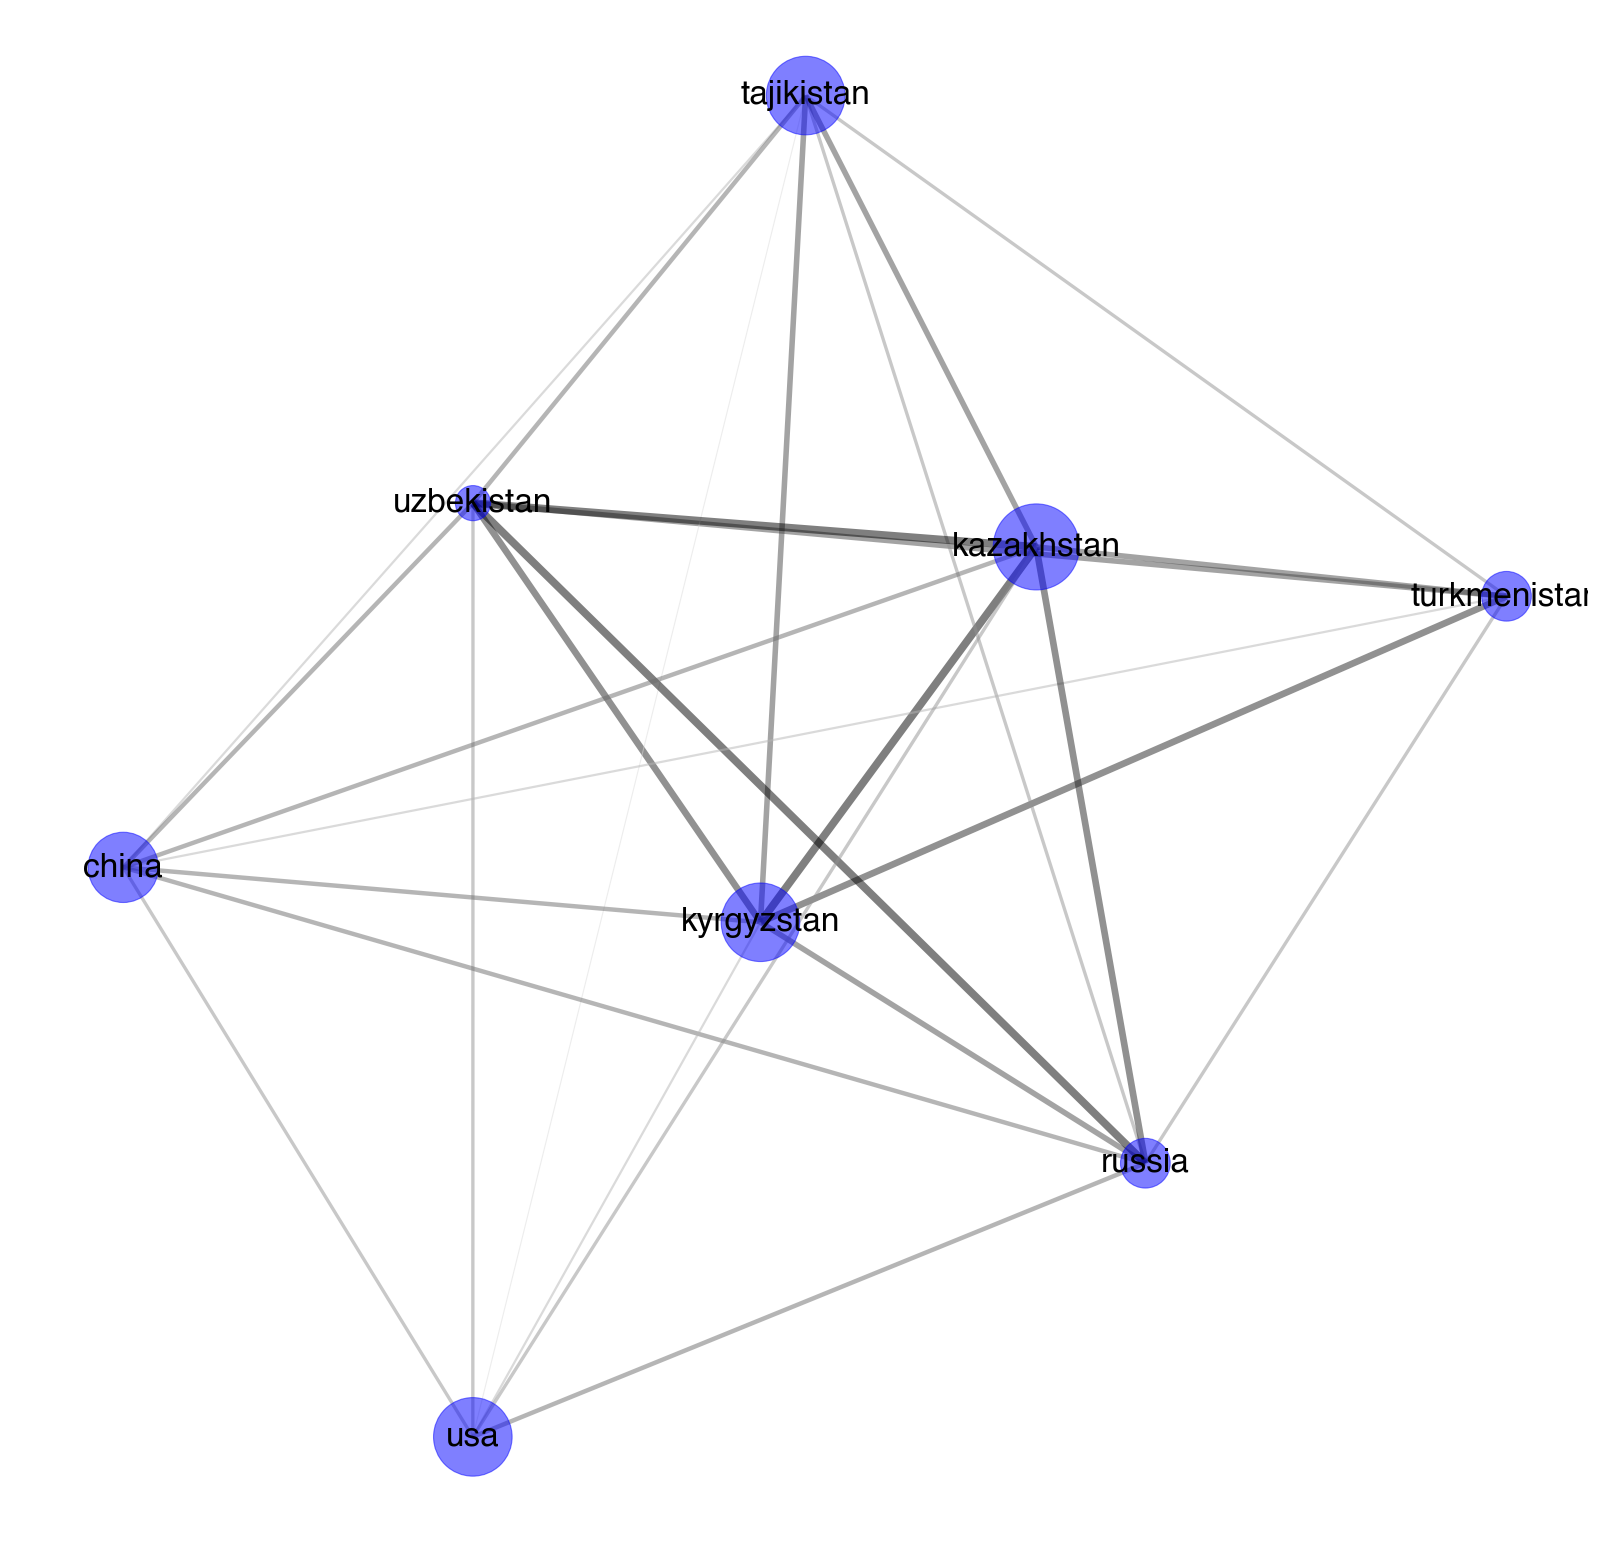

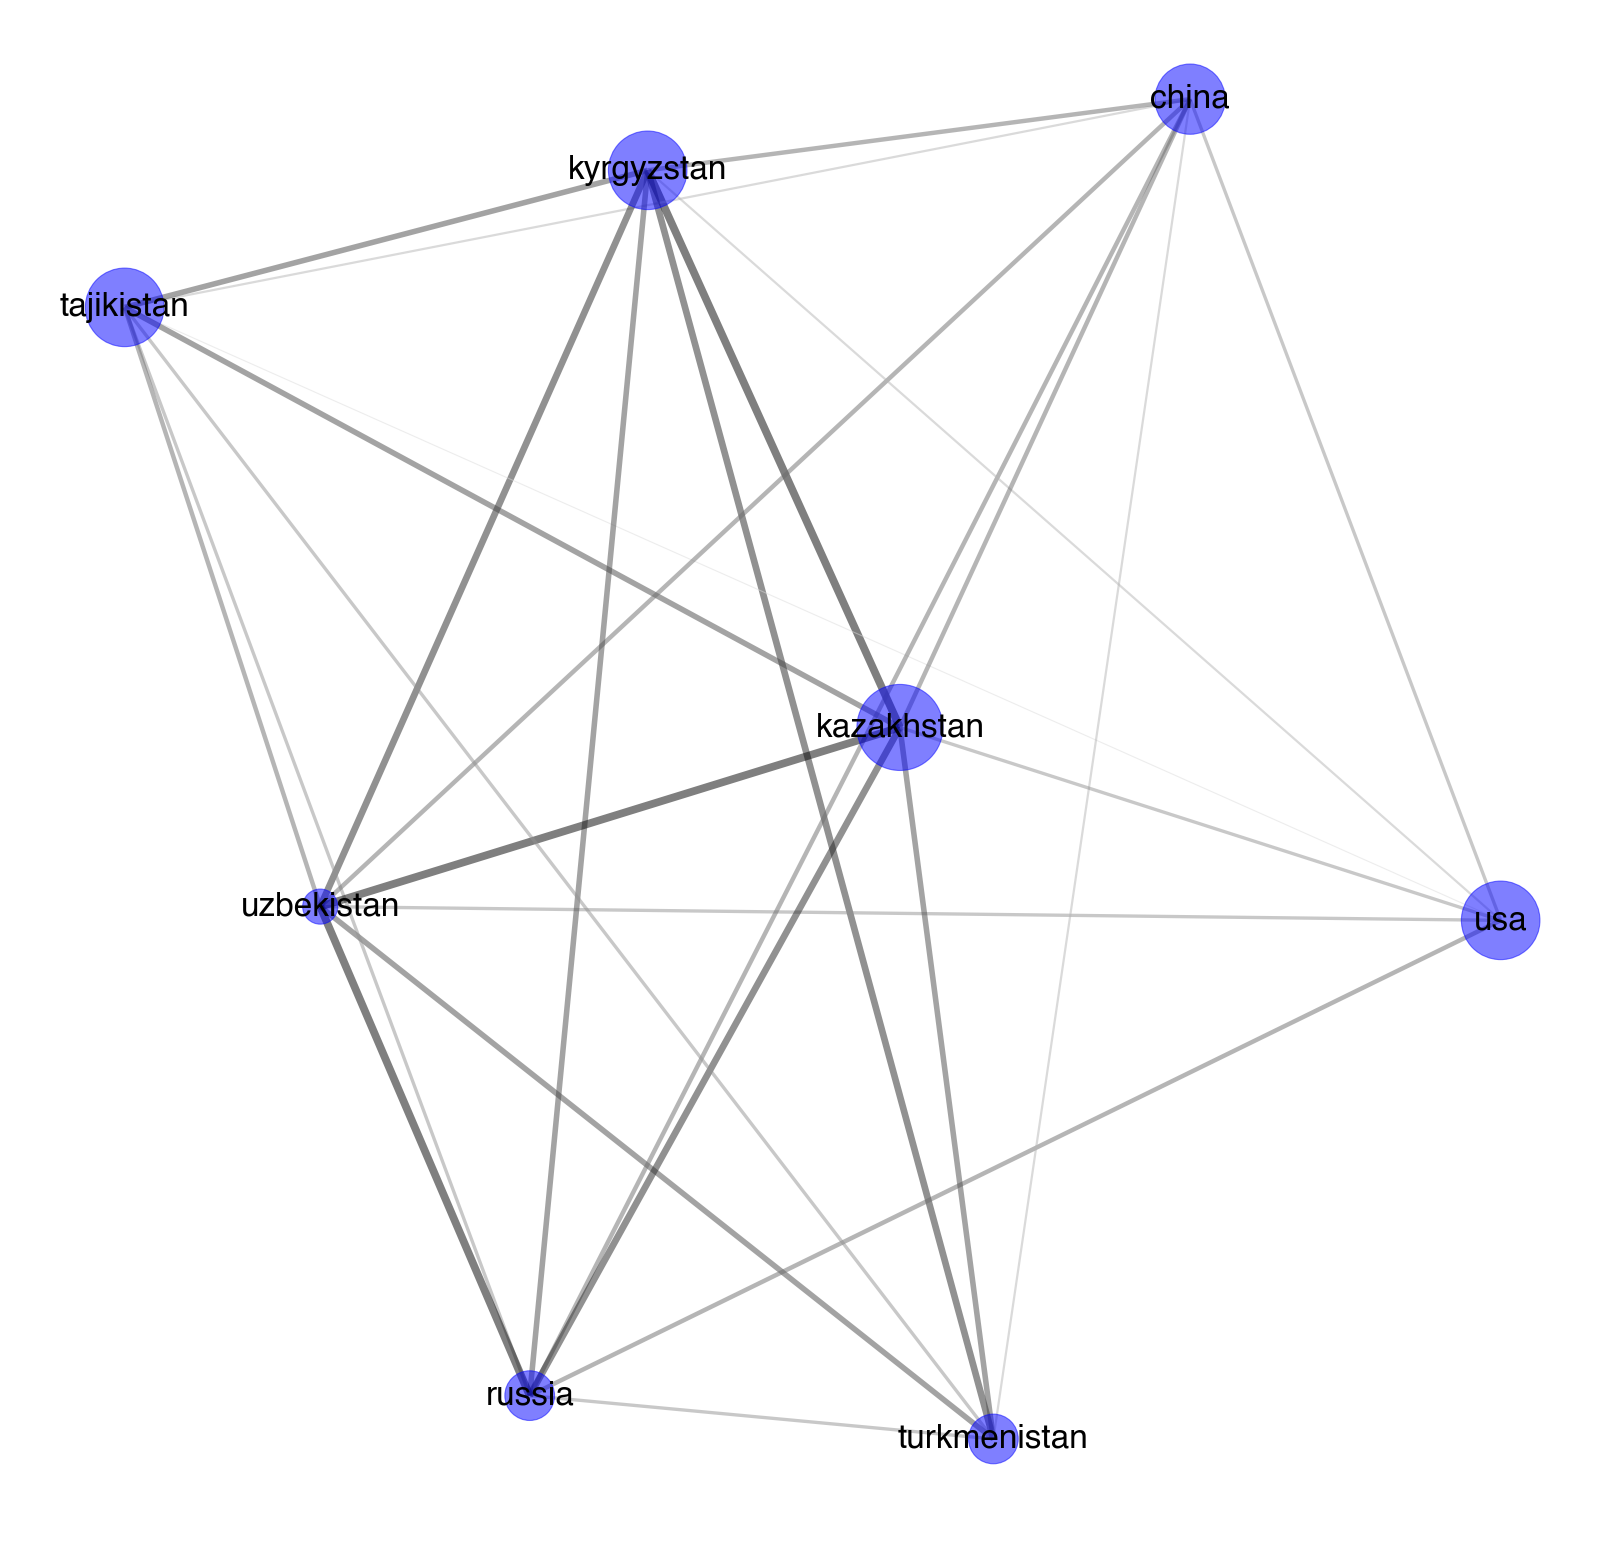

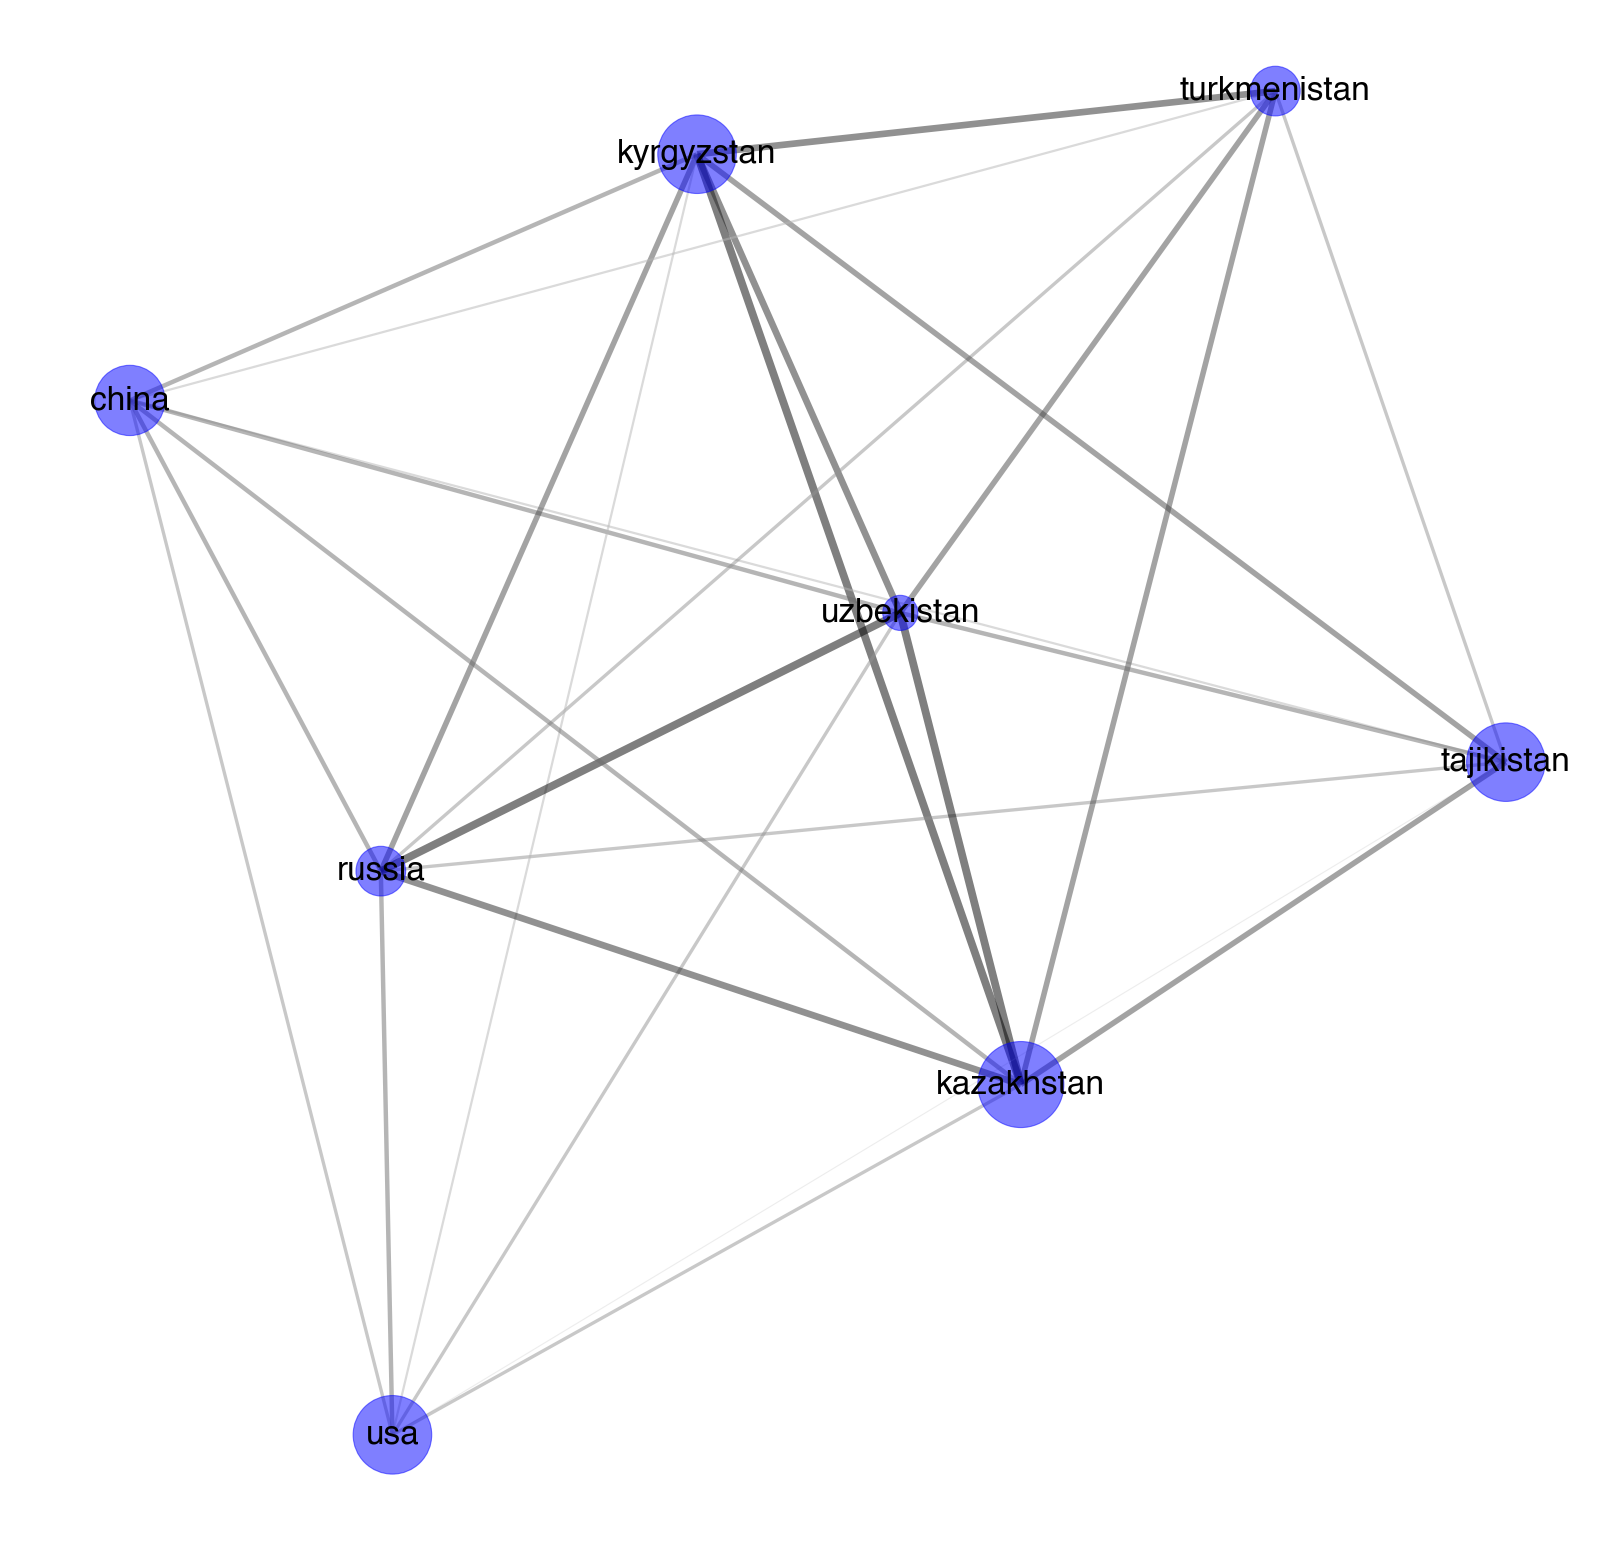

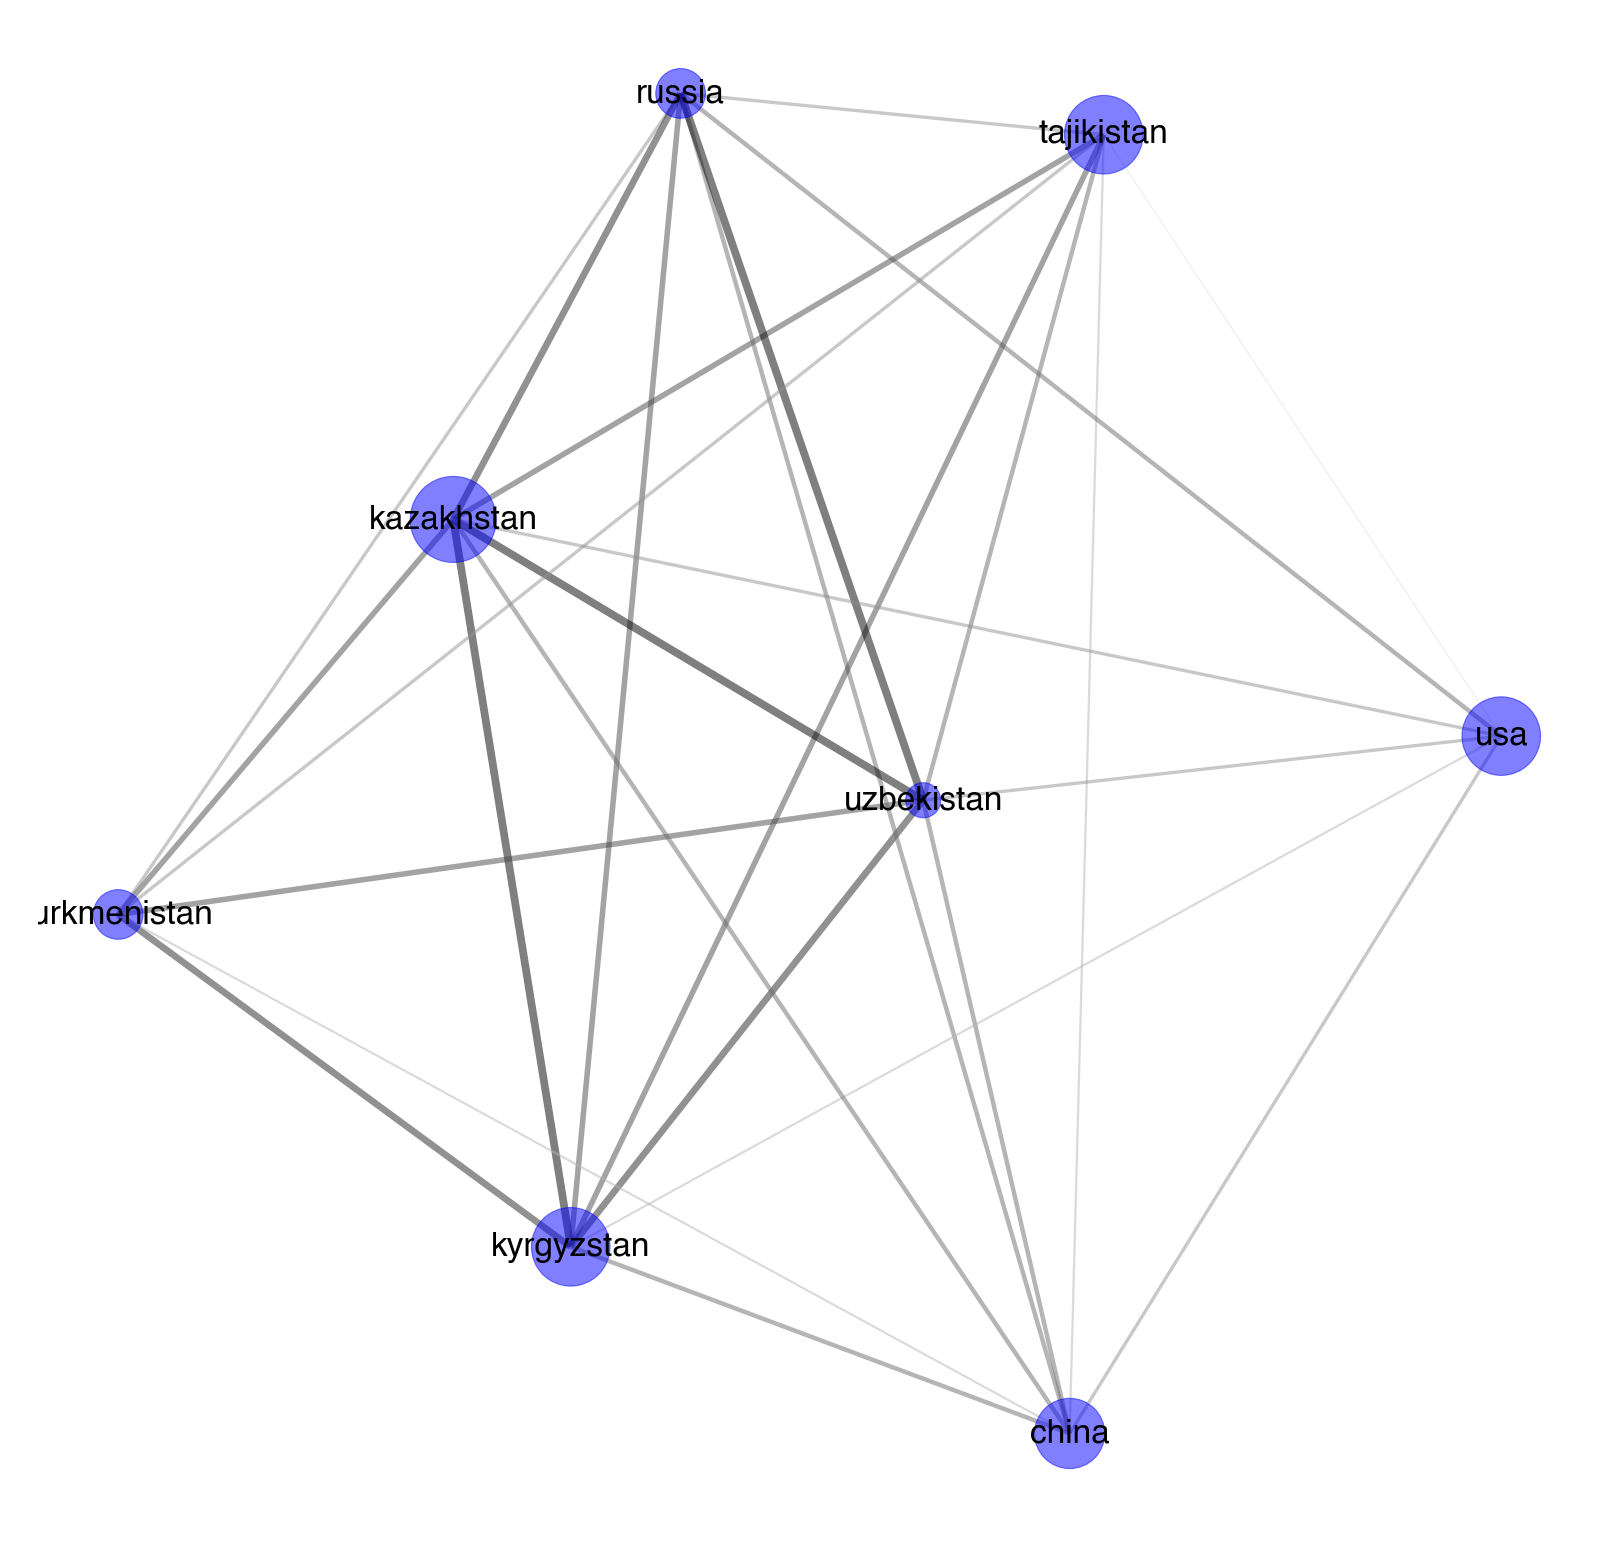

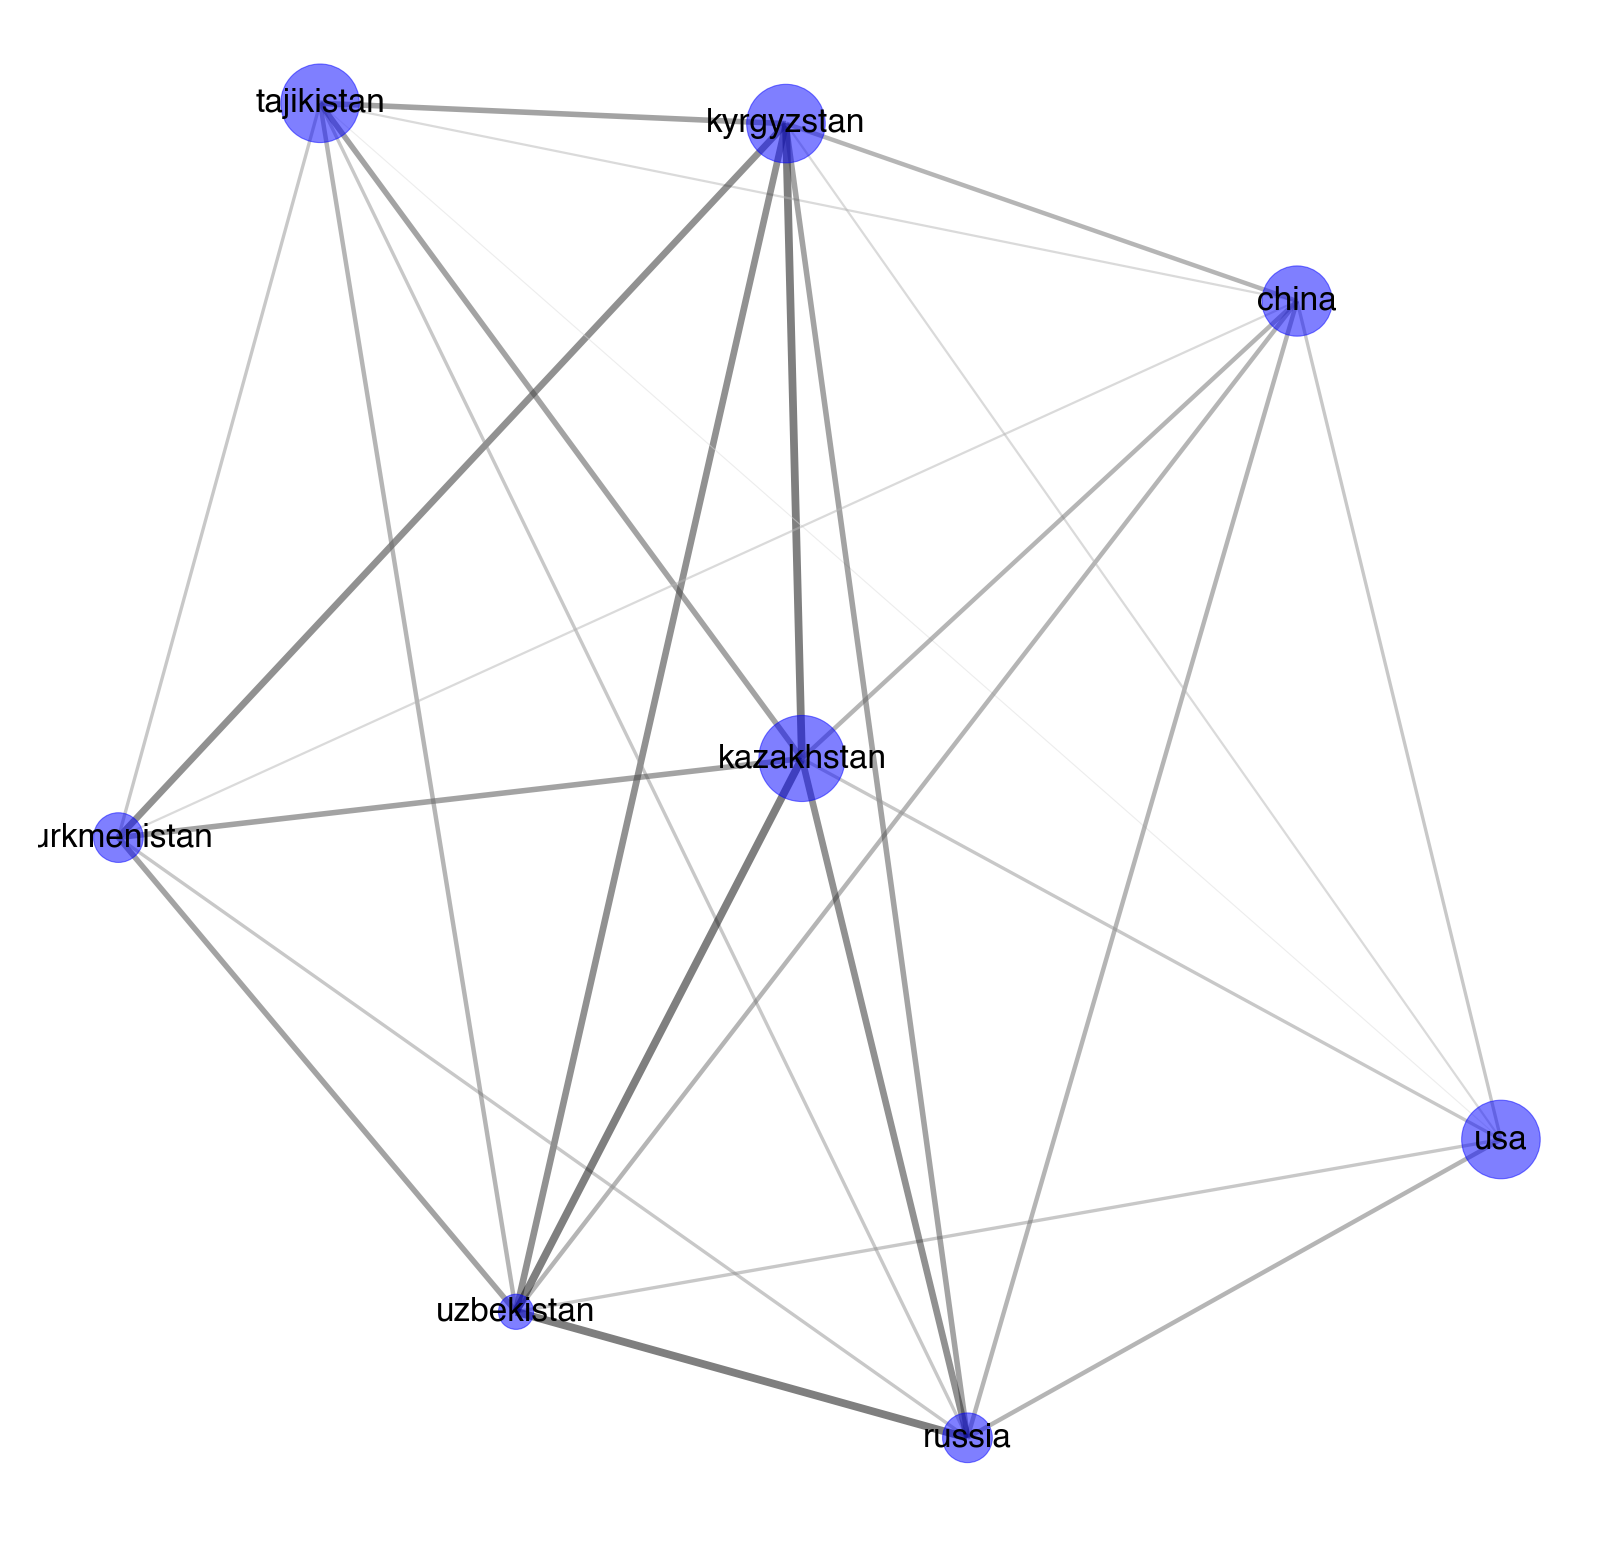

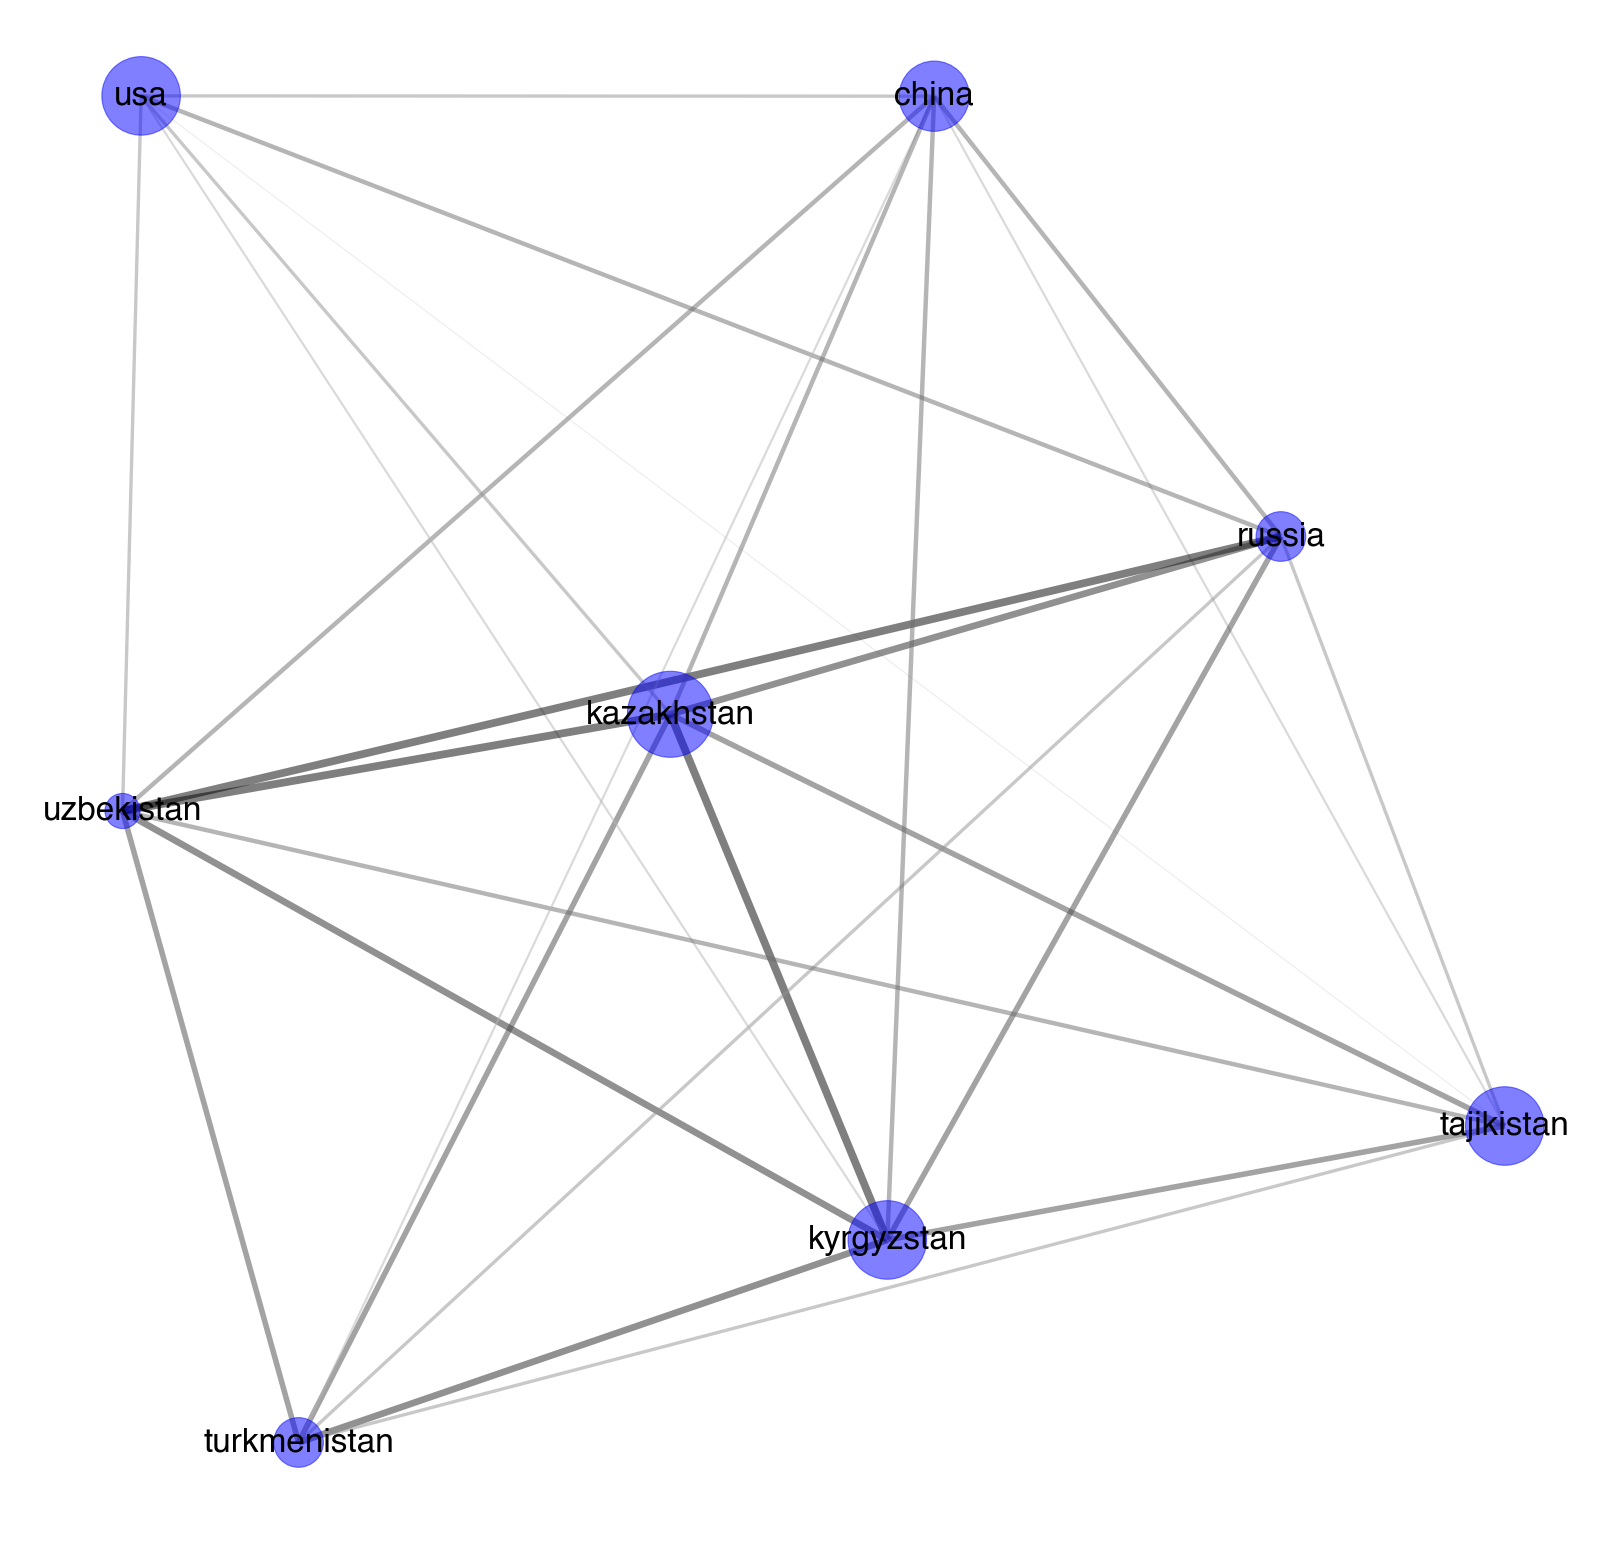

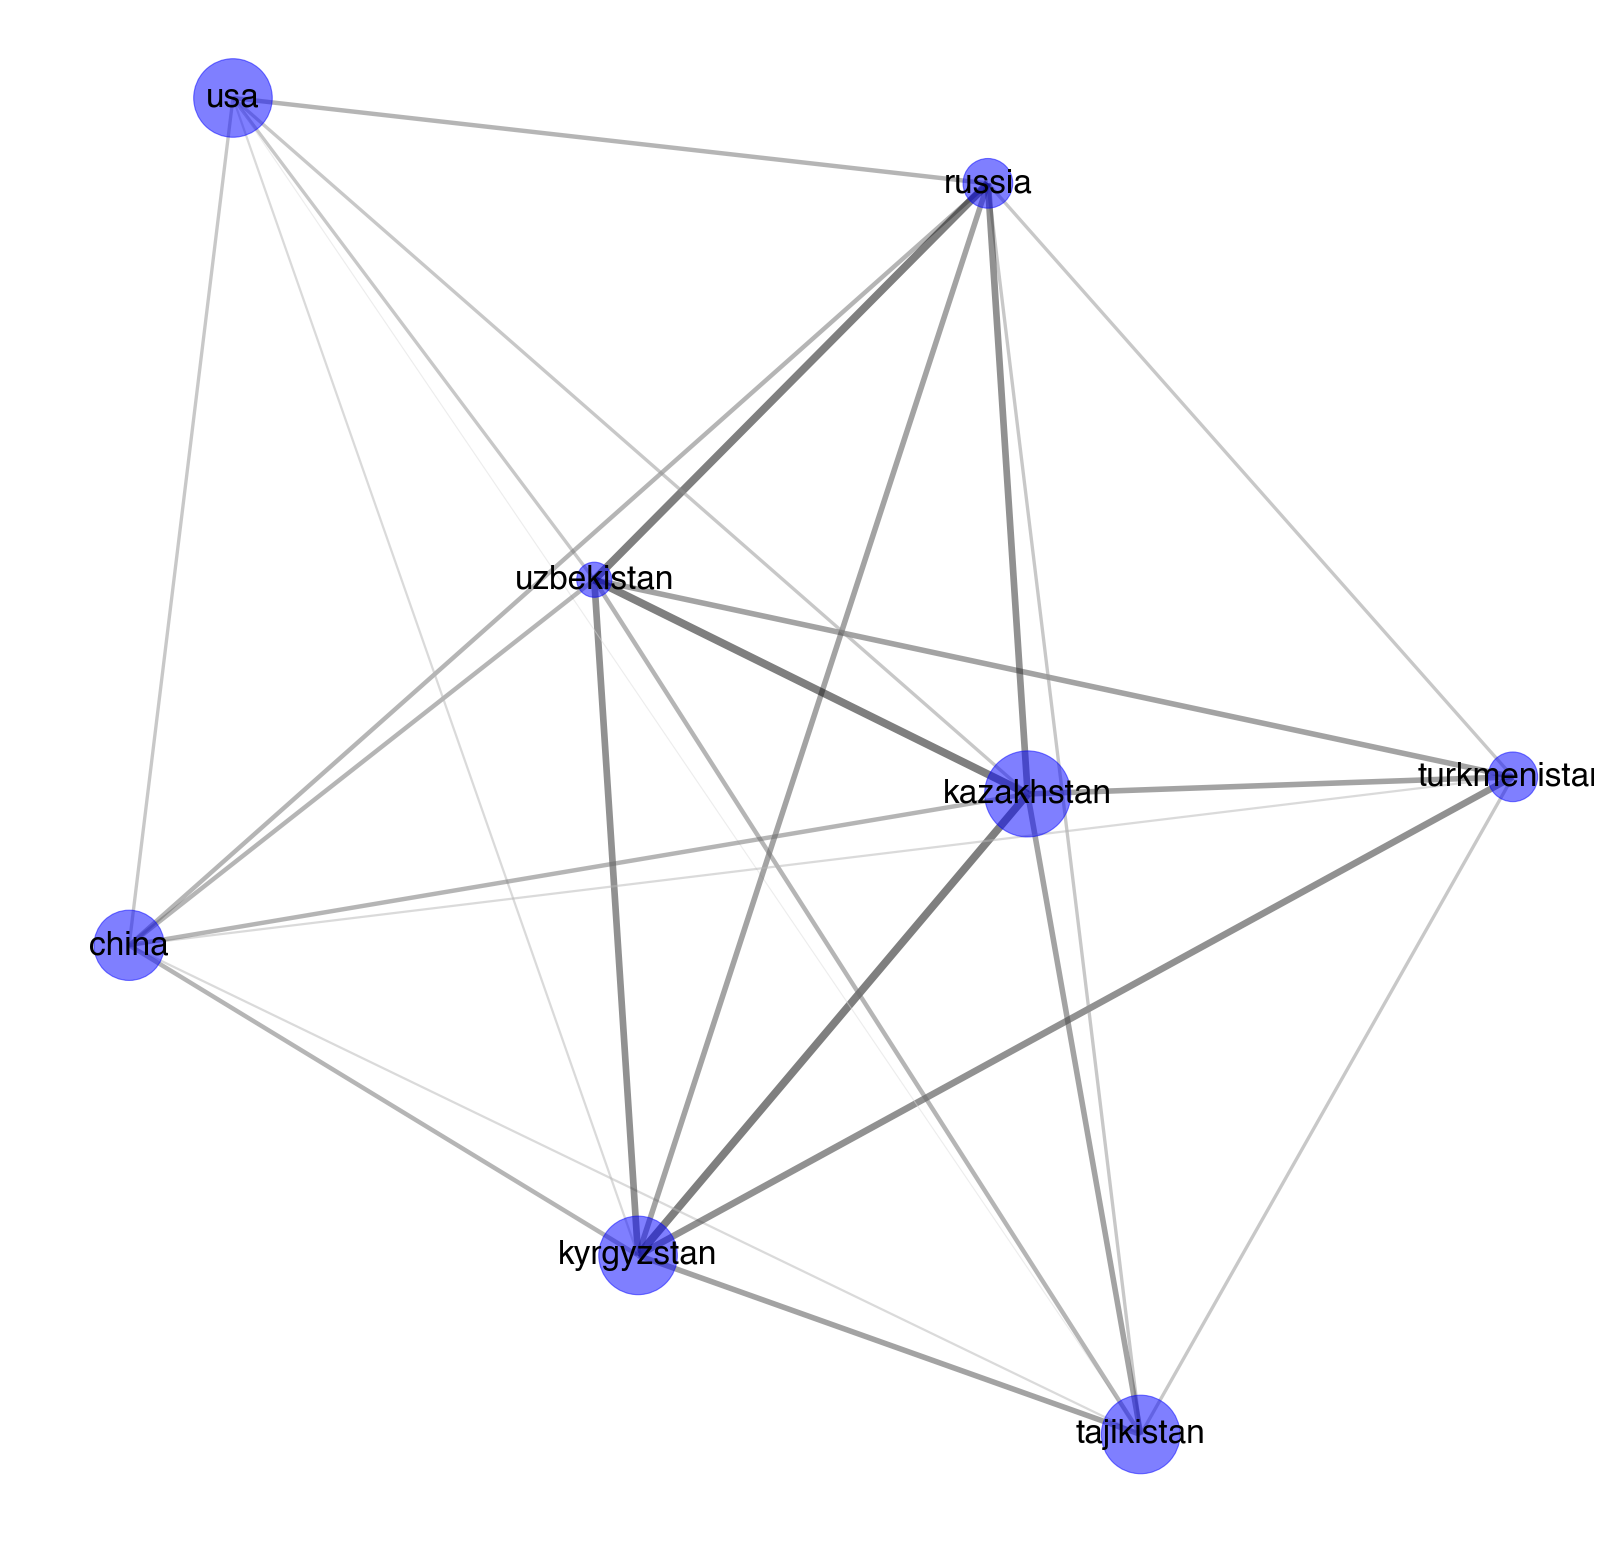

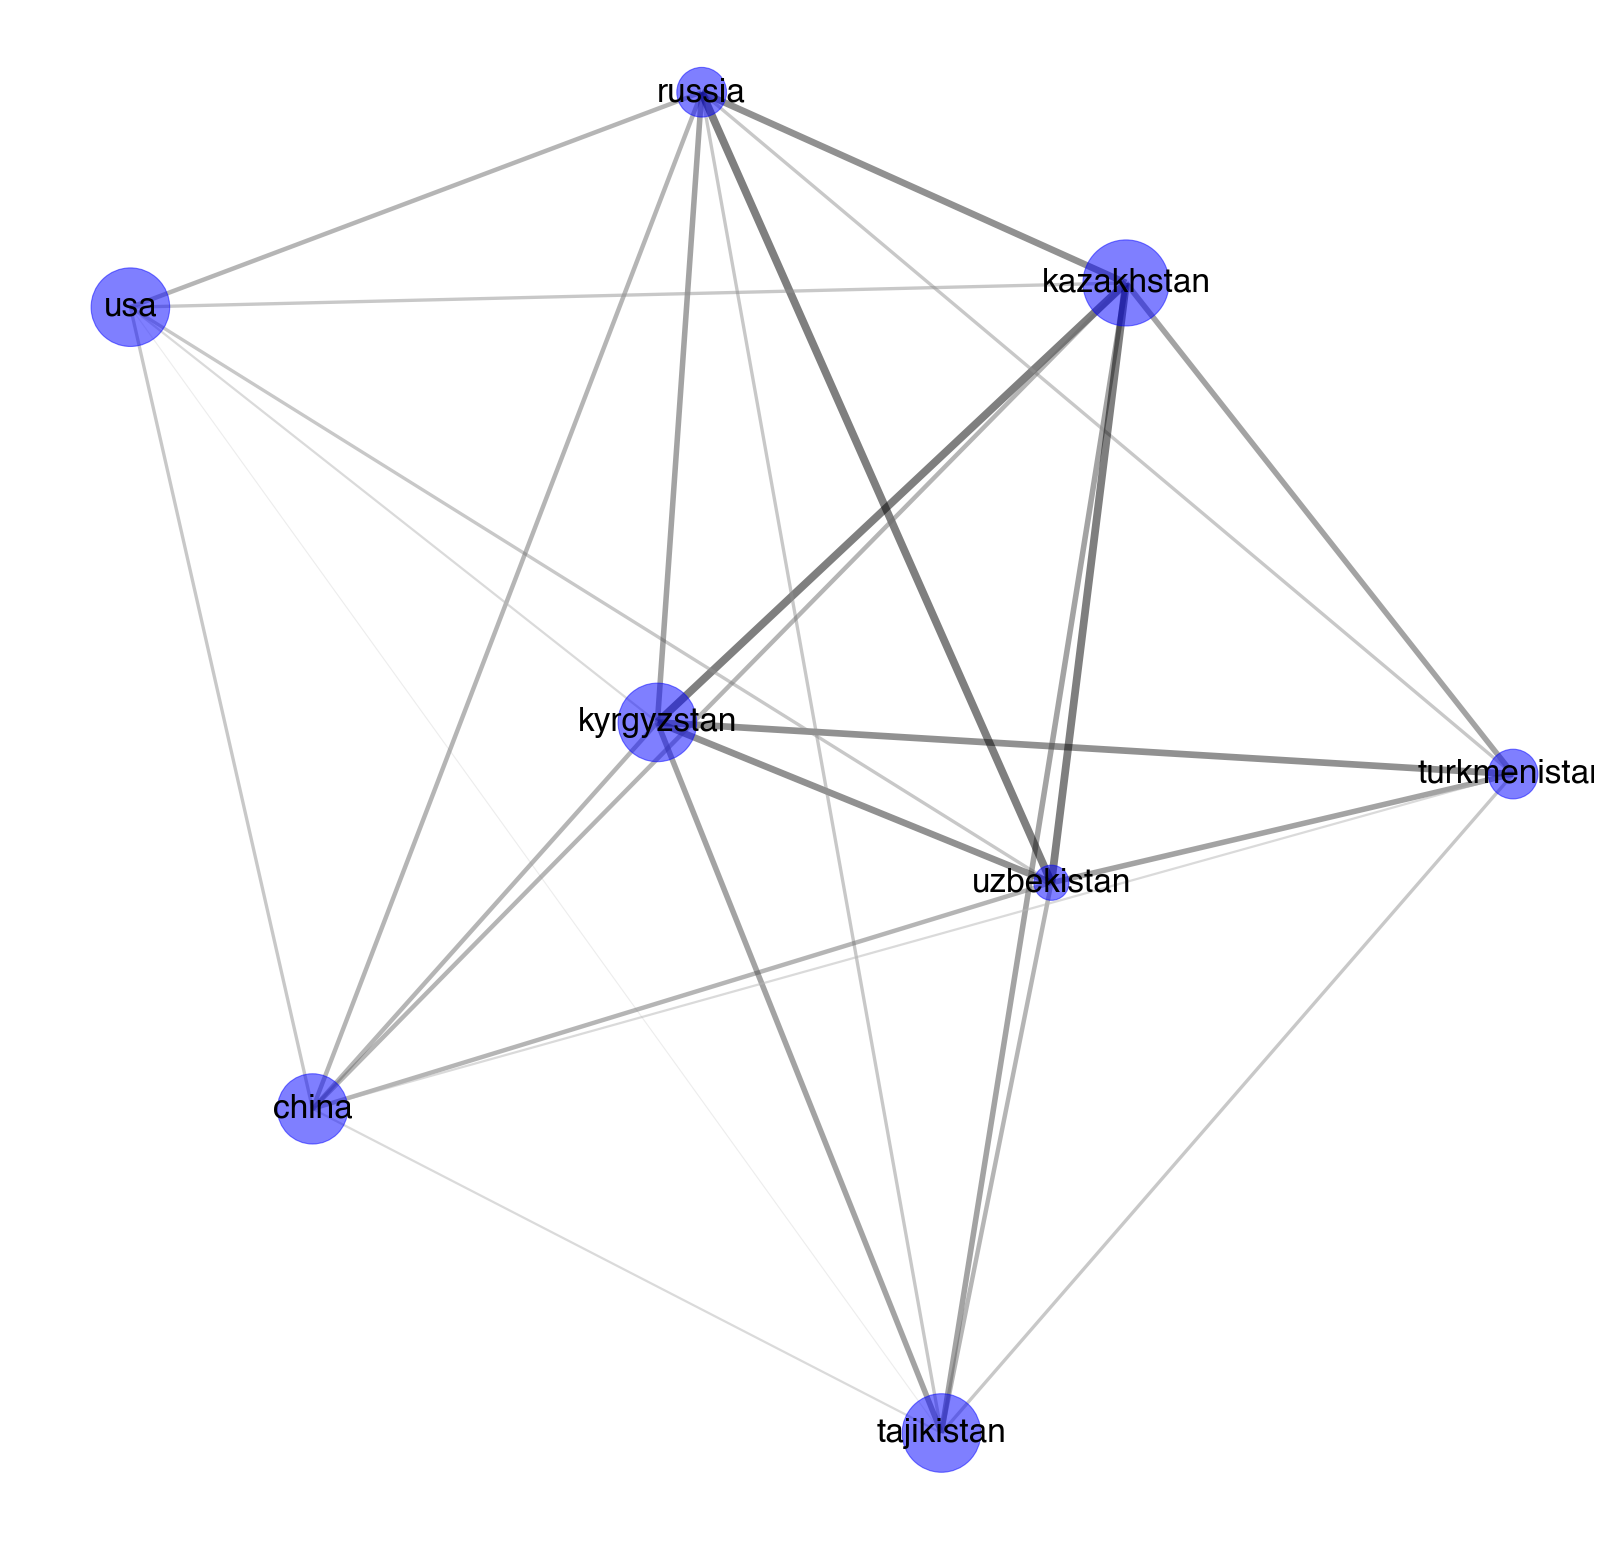

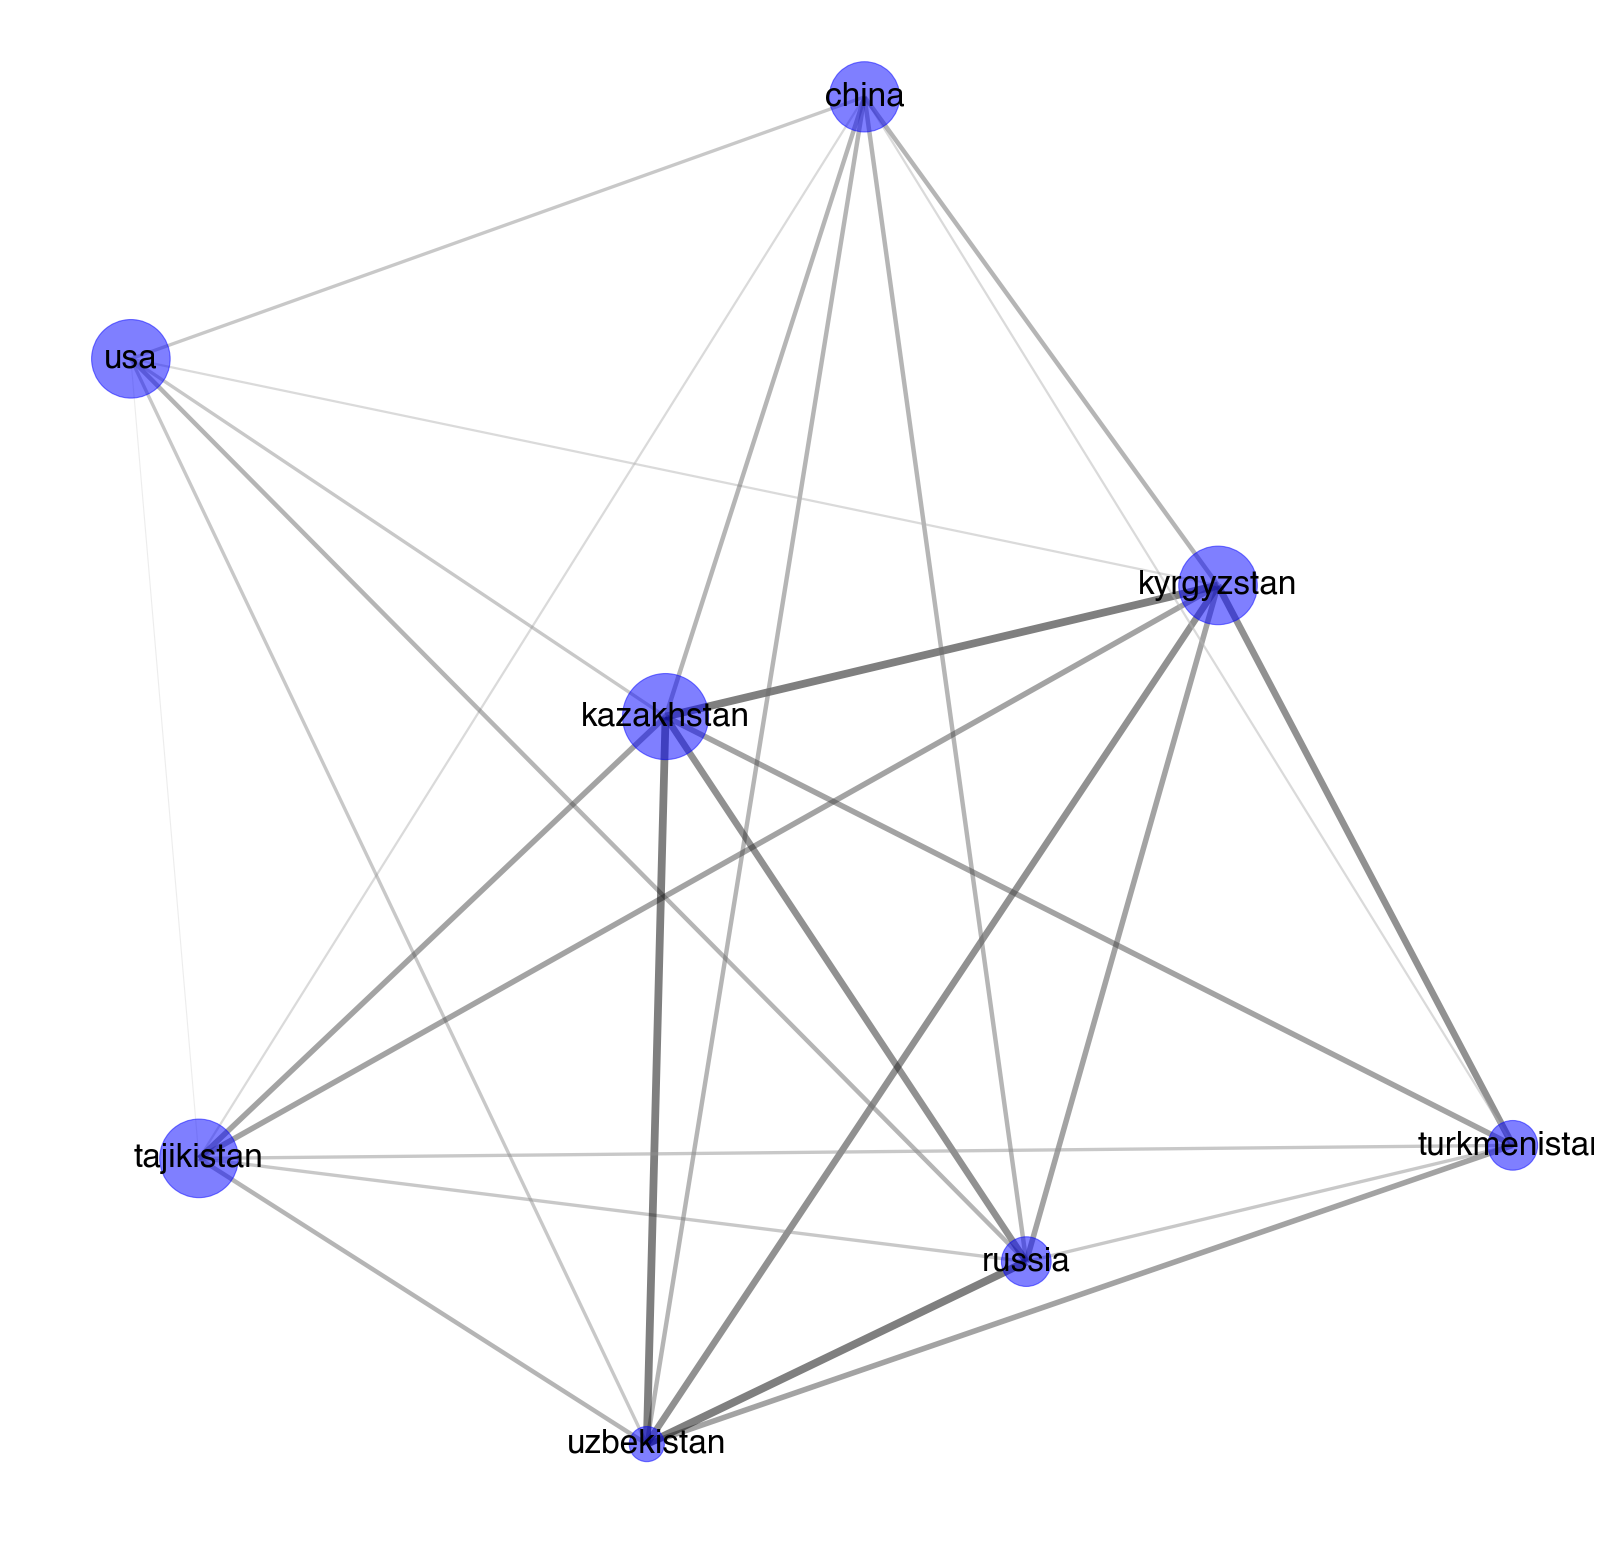

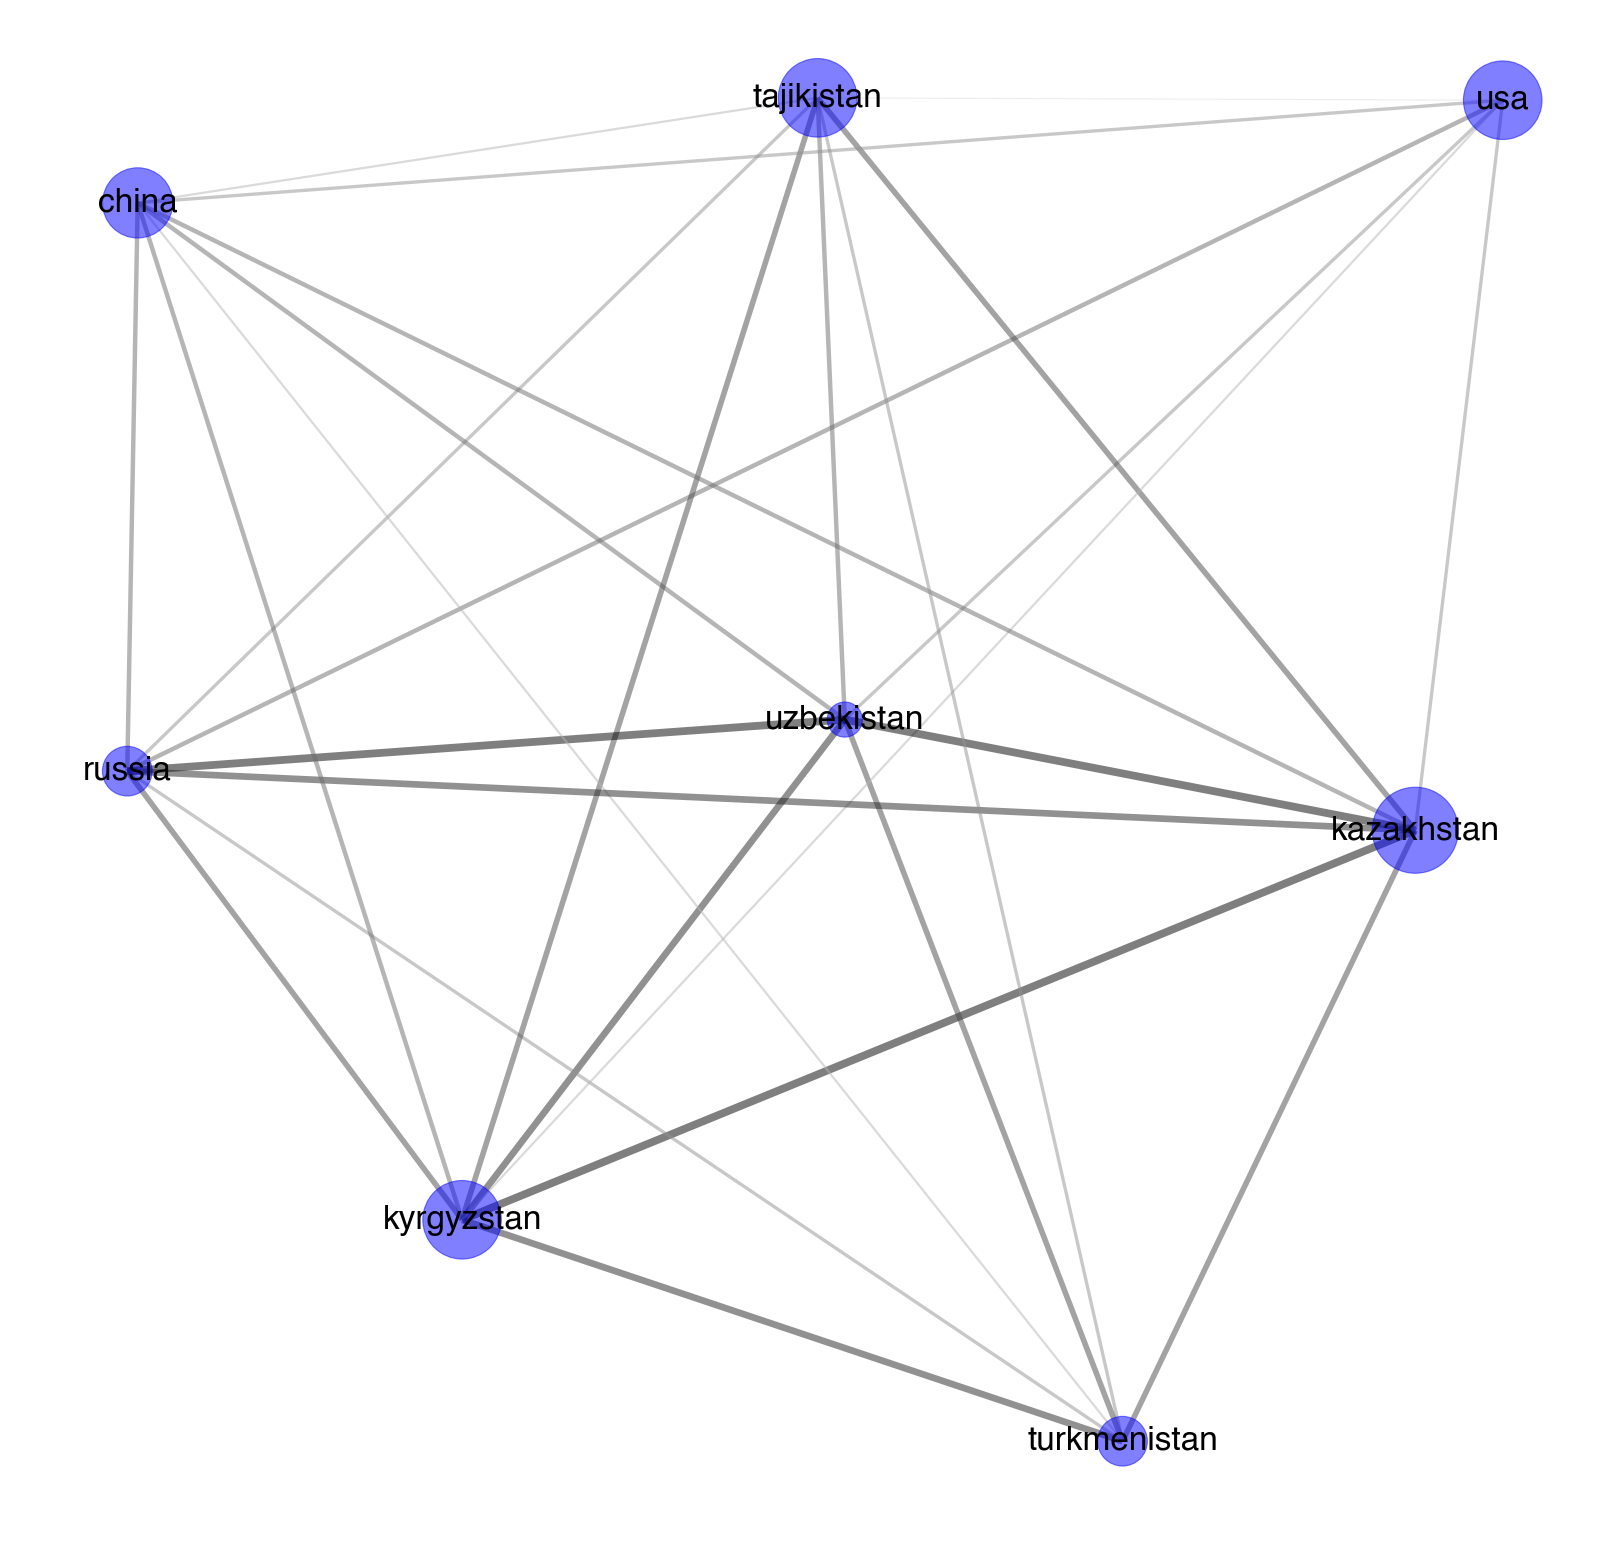

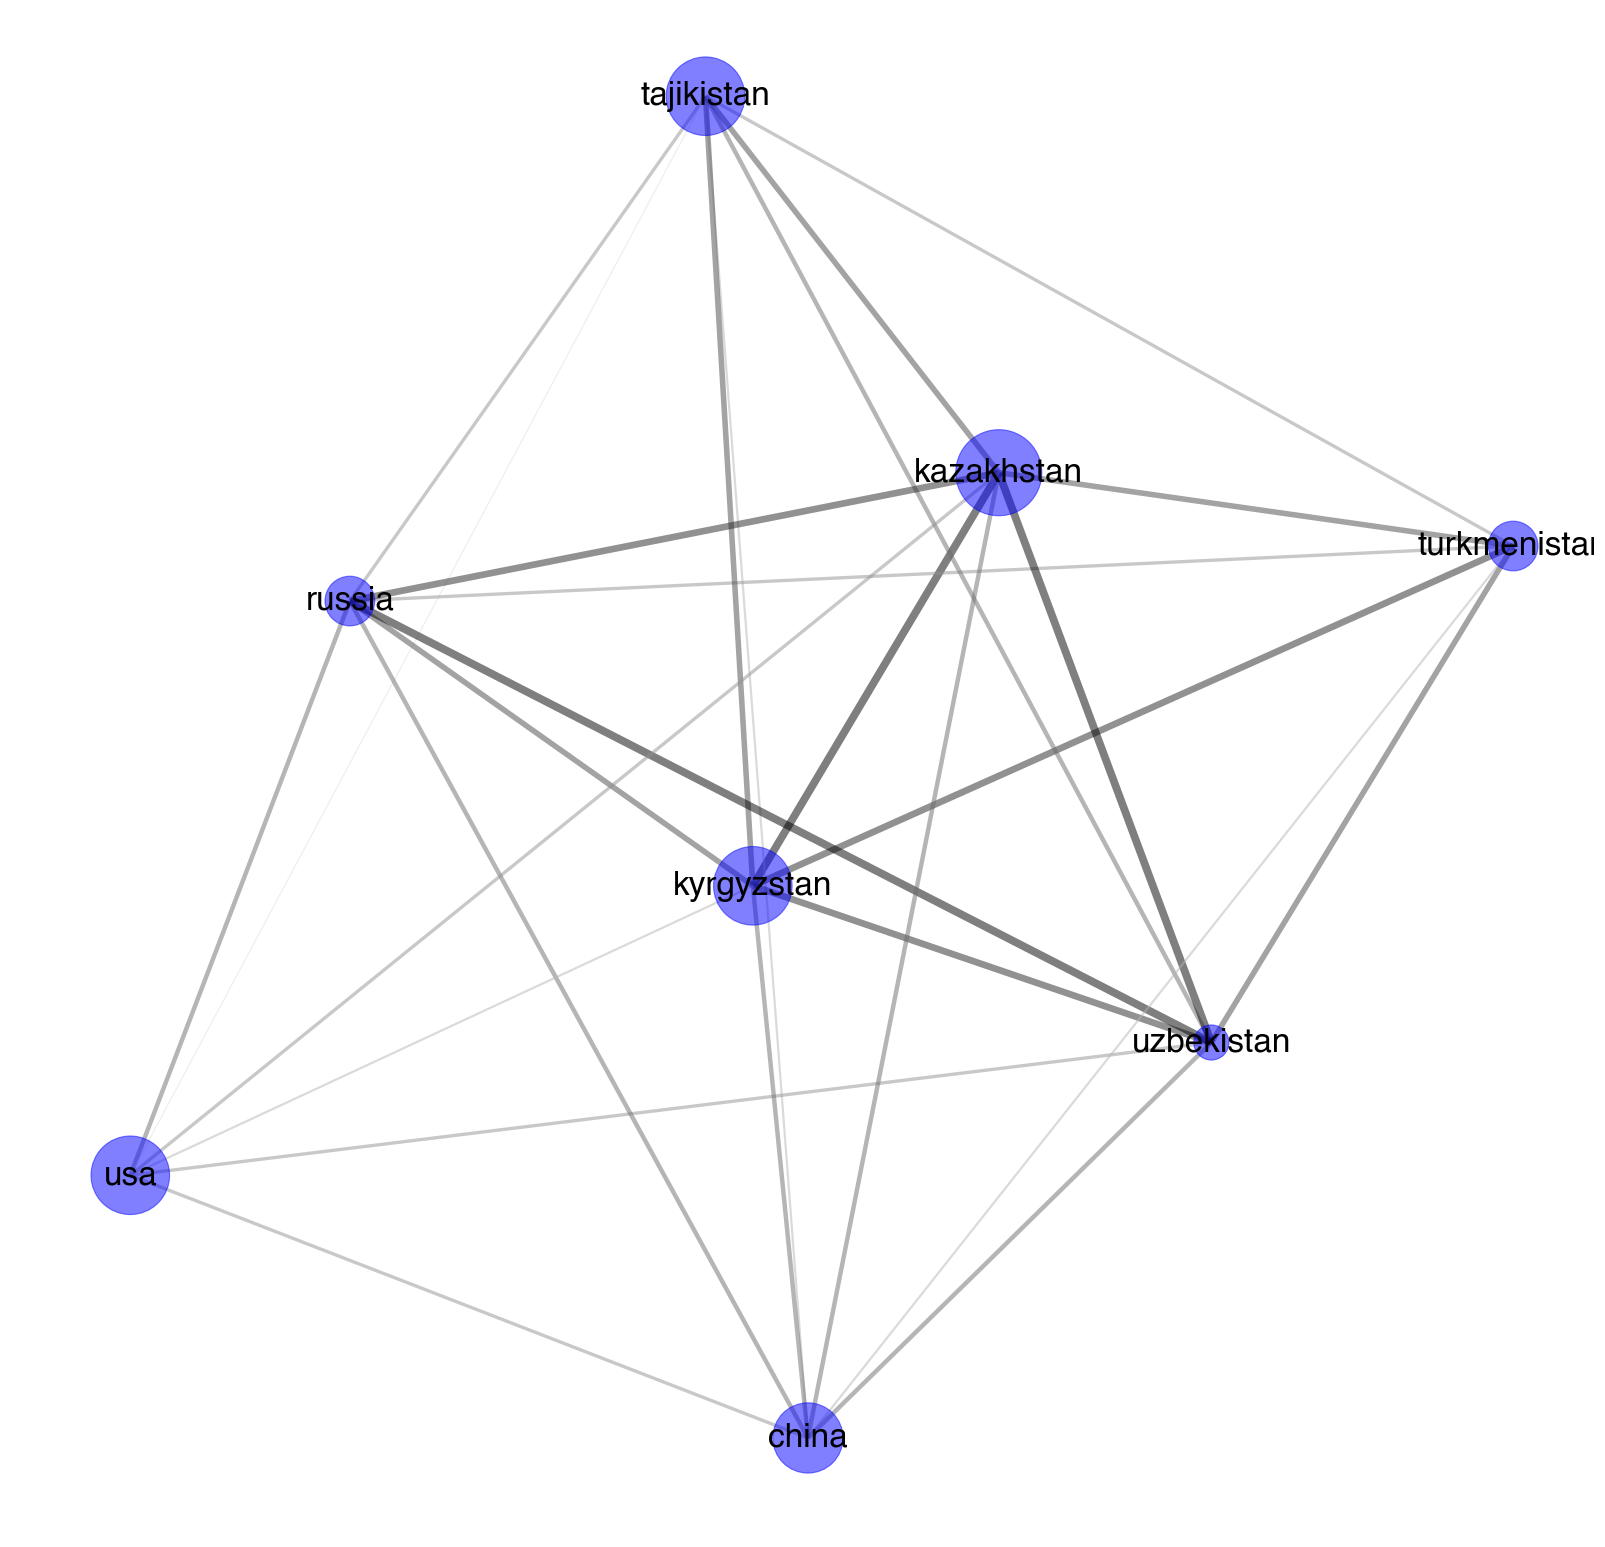

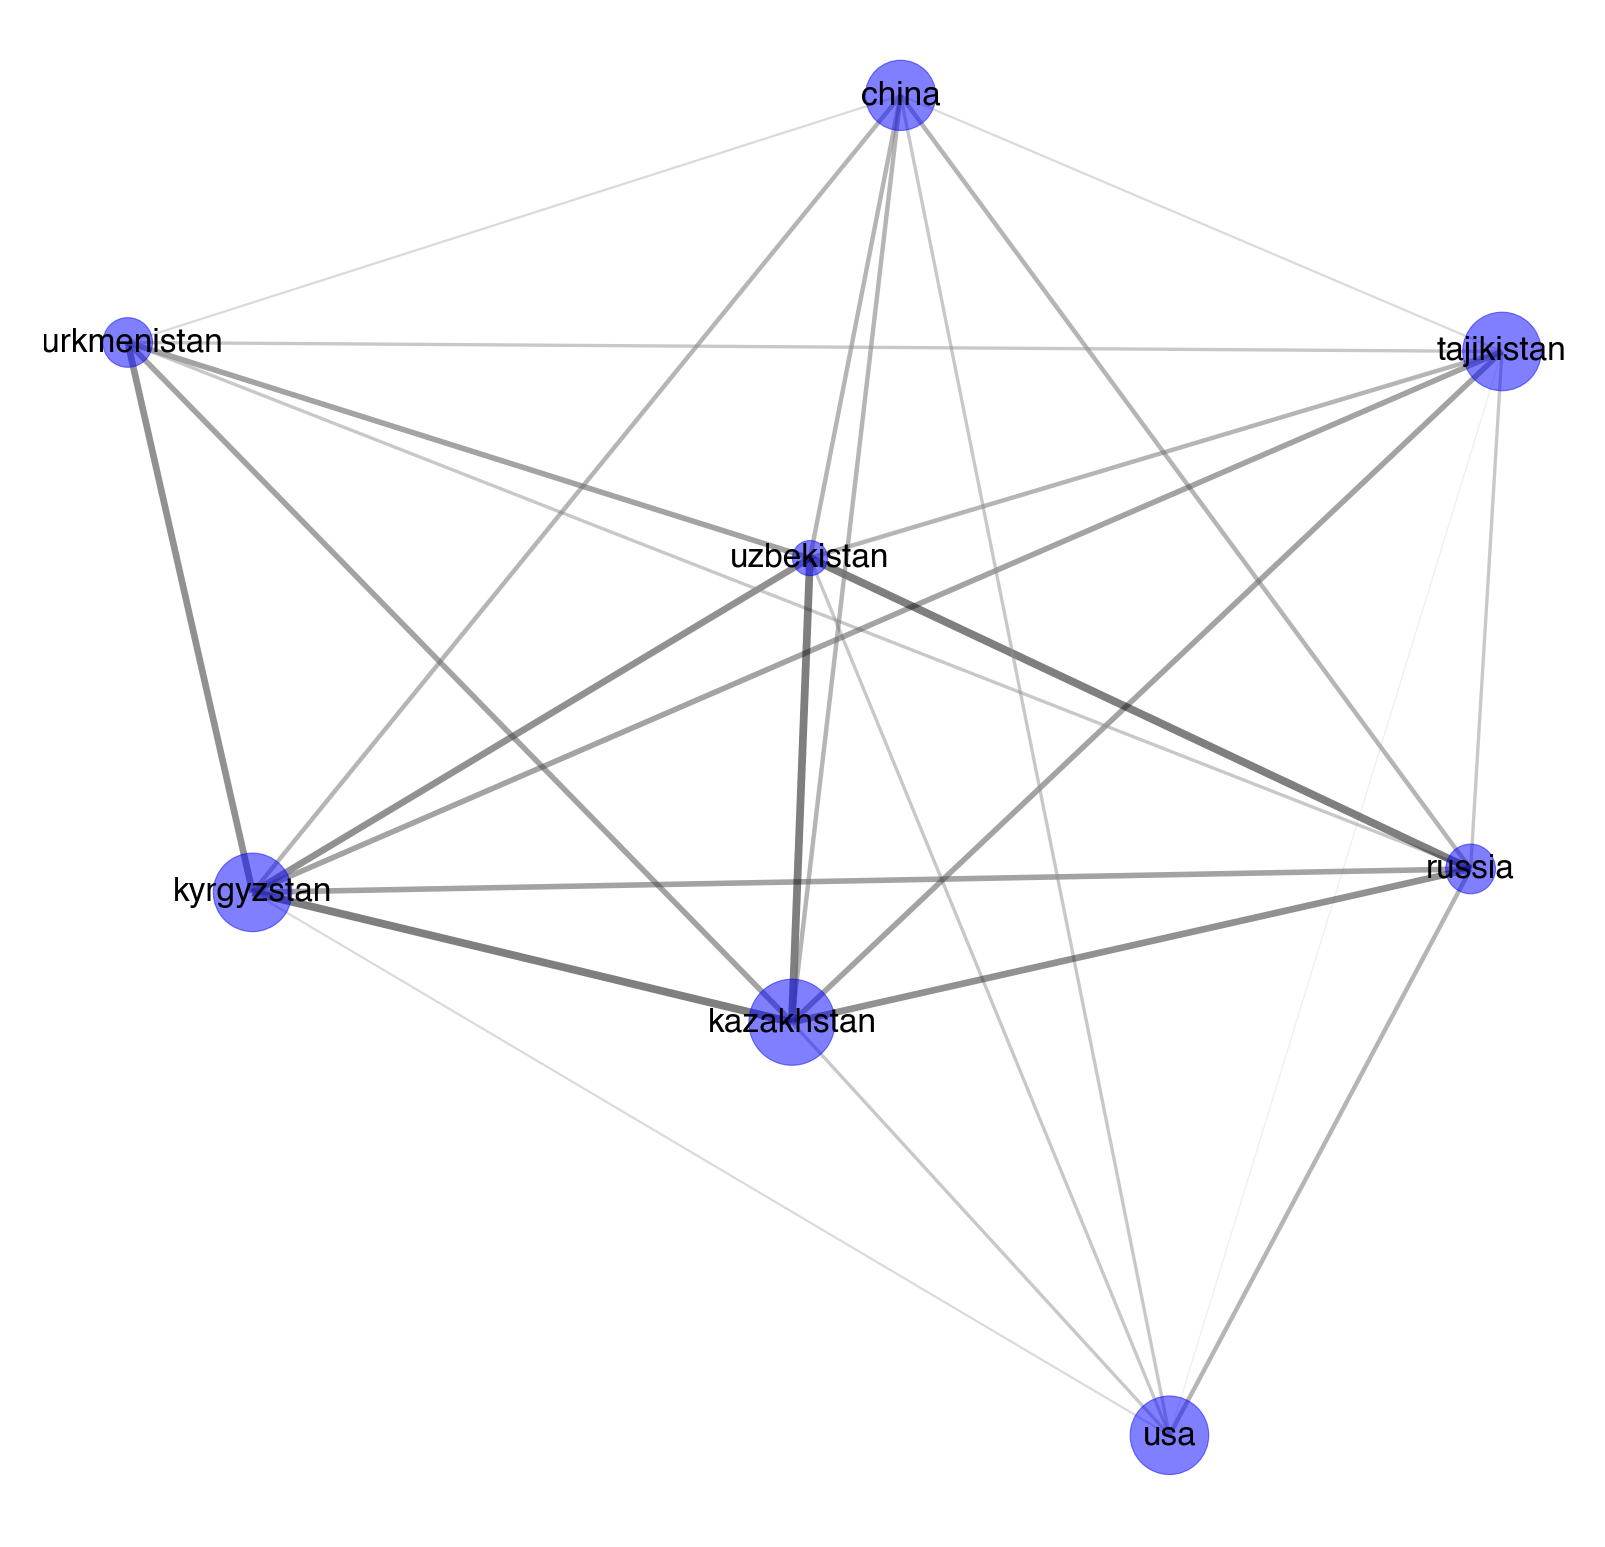

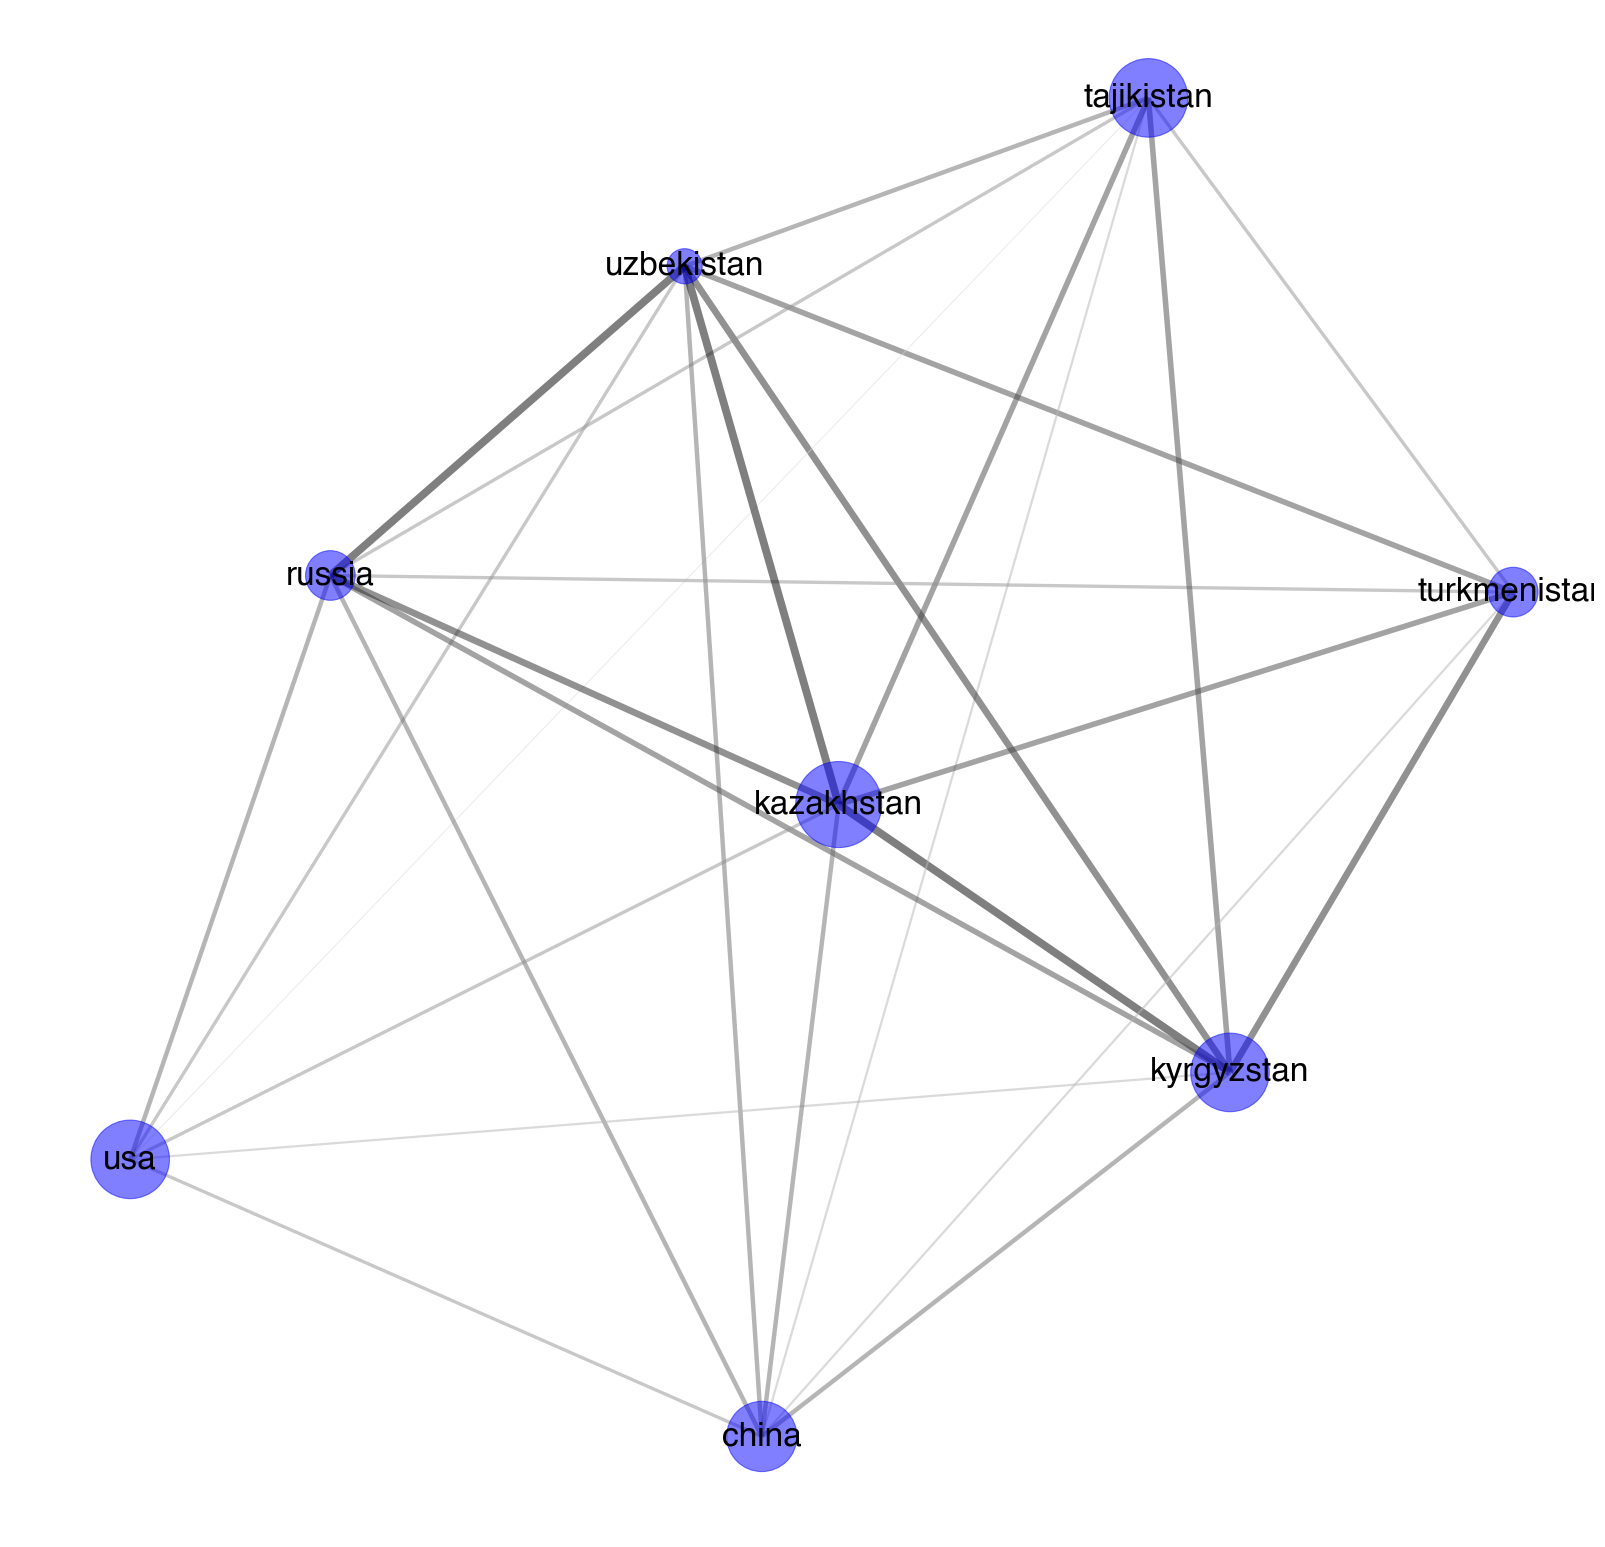

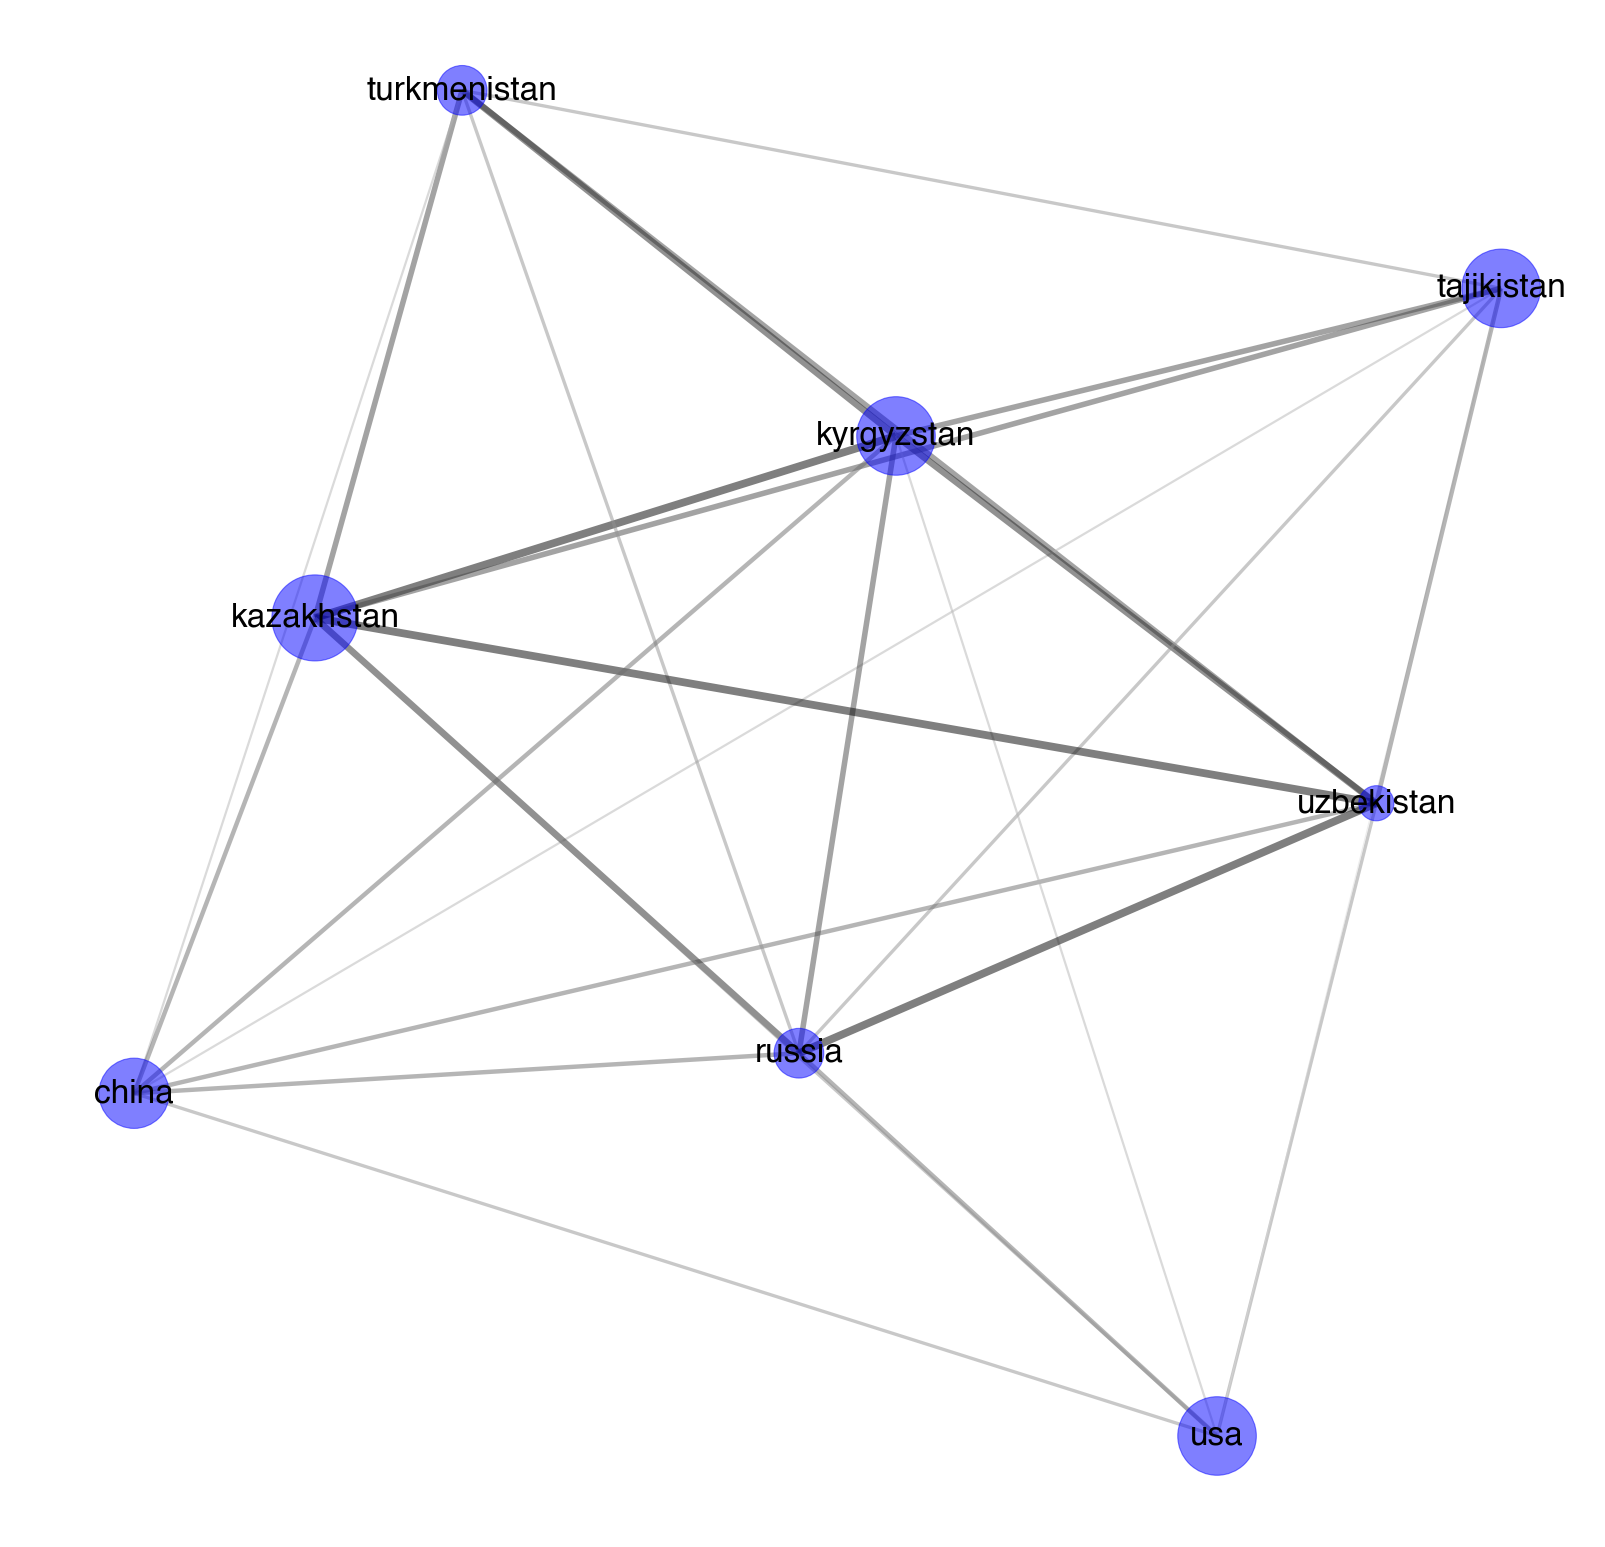

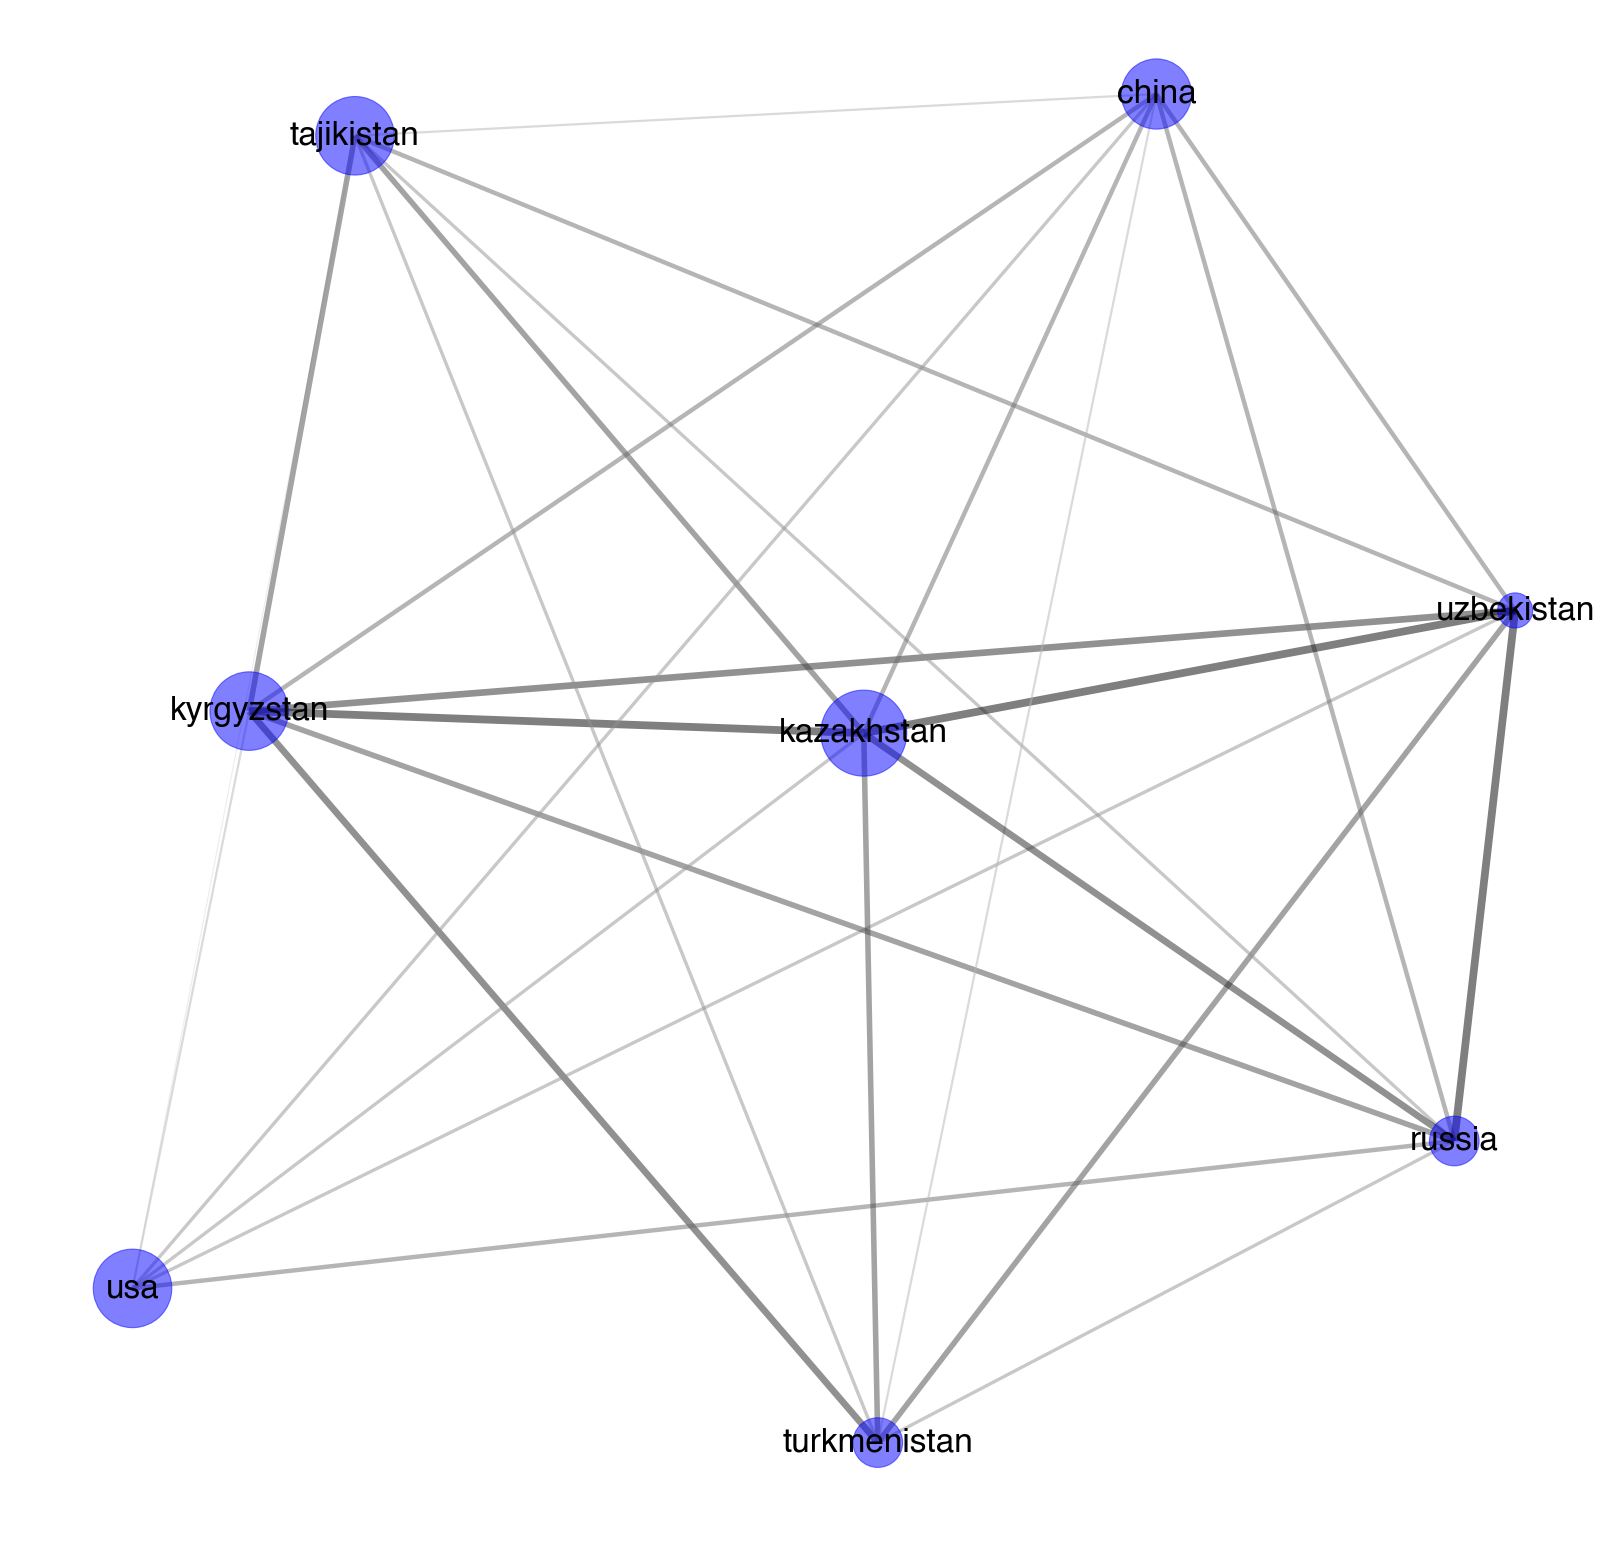

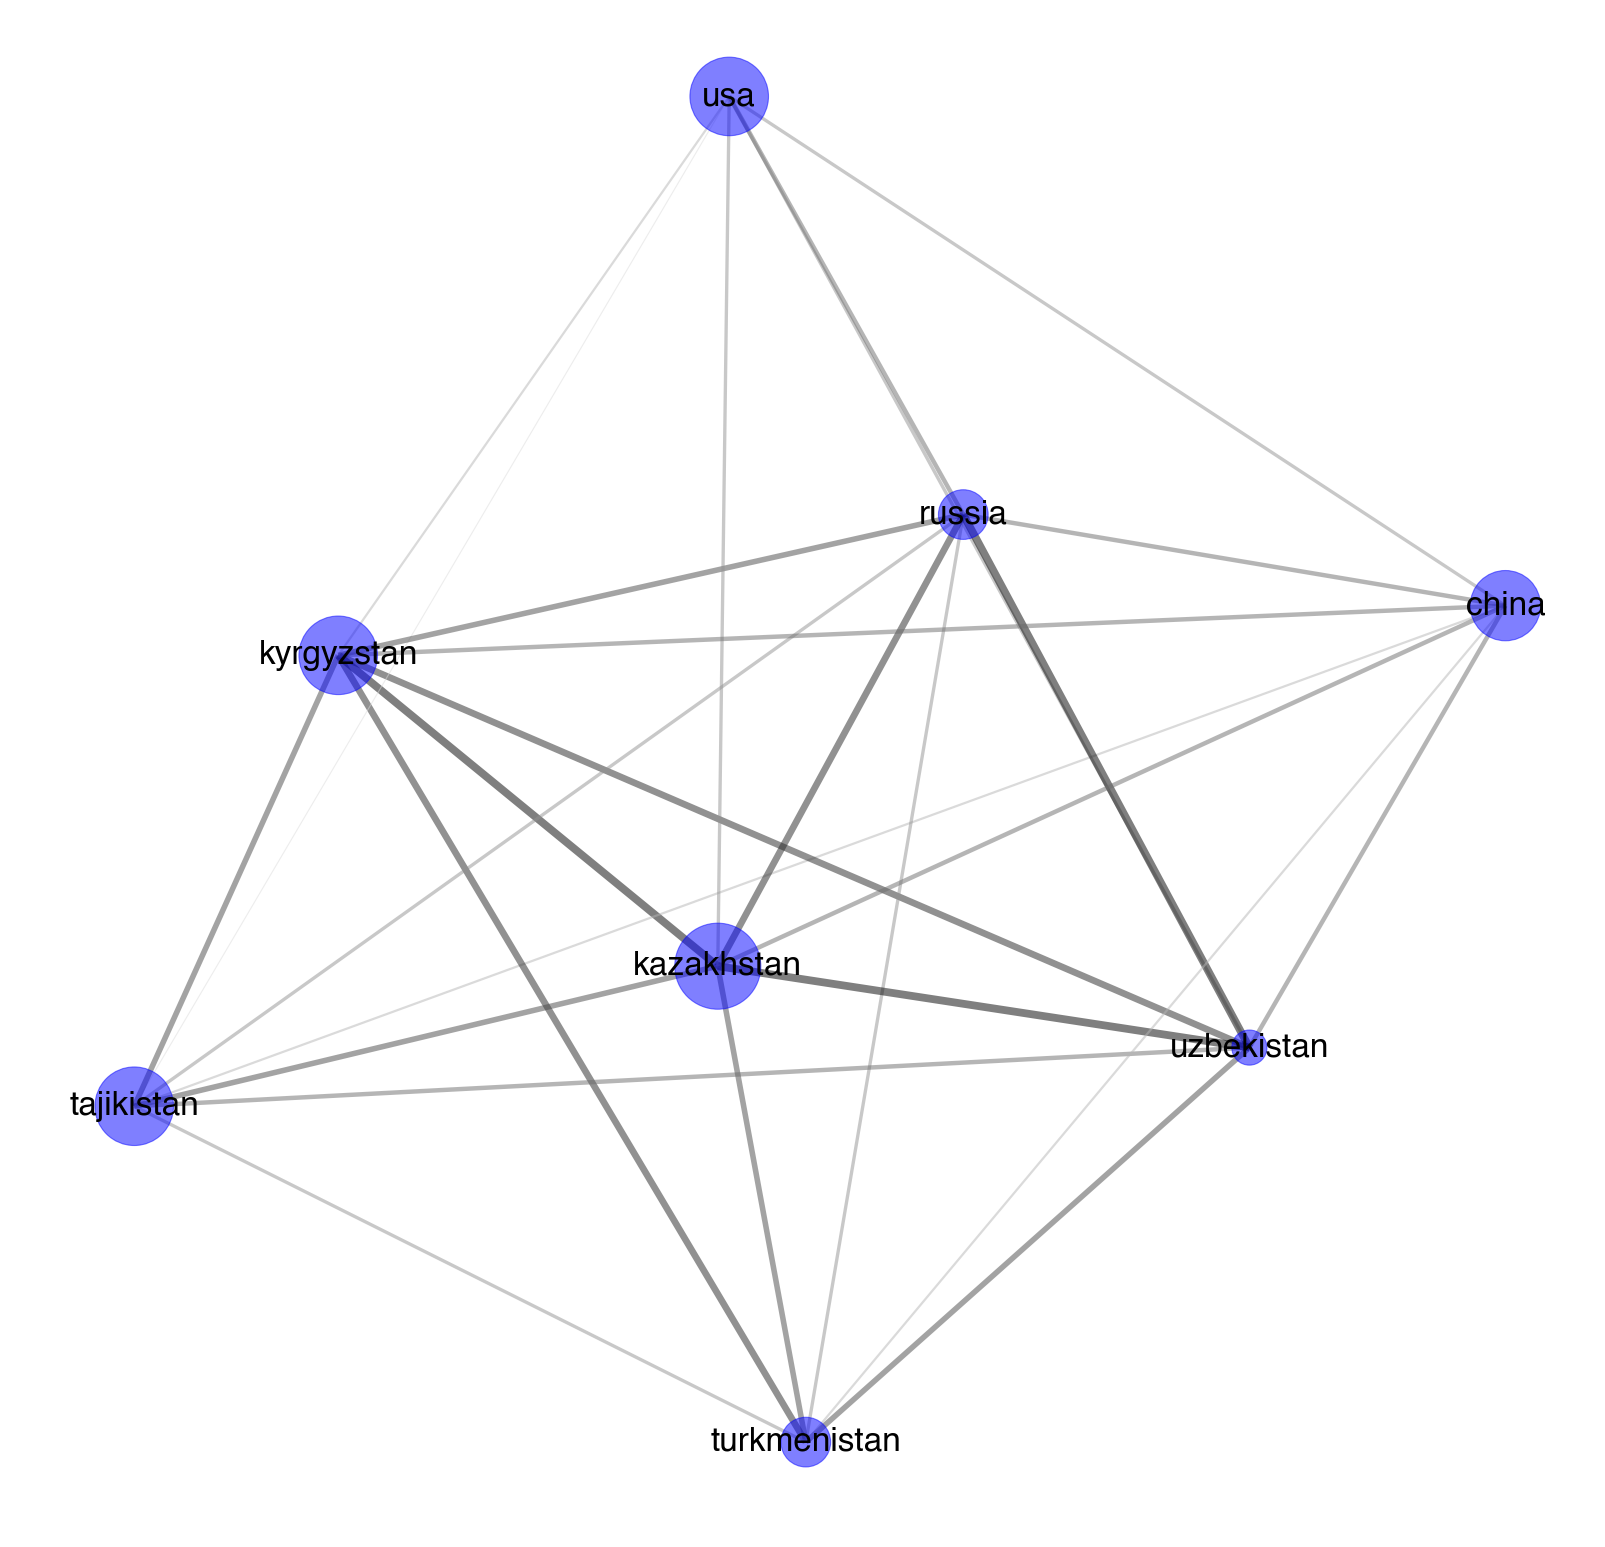

In [98]:
for i in range(20):
    plt.figure(num=None, figsize=(25, 25), dpi=80)

    pos=nx.spring_layout(G,iterations=800) # positions for all nodes

    # nodes
    #nx.draw_networkx_nodes(G,pos,node_size=100)

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')

    nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights,alpha=0.5,node_size=(d*1000-6000).tolist(),width=(np.array(weights)-2).tolist(), edge_cmap=plt.cm.binary)
    datename = "analysis" + datetime.now().strftime( "_%Y%m%d__%H_%M_%S" )

    plt.savefig('%s.png'%(datename))

    ## edges
    #nx.draw_networkx_edges(G,pos,edgelist=elarge,
    #                    width=1)
    #nx.draw_networkx_edges(G,pos,edgelist=esmall,
    #                    width=1,alpha=0.5,edge_color='b',style='dashed')
    #
    ## labels
    #nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')
    #
    #plt.axis('off')
    #plt.savefig("weighted_graph.png") # save as png
    #plt.show() # display

In [94]:
(np.array(weights)).tolist()

[9.0,
 7.0,
 4.0,
 8.0,
 5.0,
 8.0,
 6.0,
 5.0,
 3.0,
 7.0,
 6.0,
 6.0,
 7.0,
 5.0,
 7.0,
 4.0,
 7.0,
 6.0,
 2.0,
 9.0,
 9.0,
 5.0,
 4.0,
 8.0,
 5.0,
 6.0,
 6.0,
 5.0]

In [96]:
(d*1000).tolist()

[11000.0, 8000.0, 11000.0, 11000.0, 7000.0, 10000.0, 12000.0, 8000.0]